# **Expedientes ingresados al Tribunal Constitucional desde 1992-2023 - [Tribunal Constitucional-TC]**

* **Autor :** Saúl Kevin Ochoa Salazar


Cada registro corresponde a un expediente ingresado al Tribunal Constitucional para su deliberación. La mayoría de los expedientes son remitidos desde las Salas especializadas de las Cortes Superiores de Justicia a Nivel Nacional. Cada mes se actualizan los datos de los registros conforme avanzan el desarrollo de los casos. Se cuenta con datos desde el año 1992 a la fecha. (De 1992 hasta el 2012 se utilizaba el antiguo sistema de gestión de expedientes en 2012 se migro al actual, en algunos casos los datos del fallo, materia, sala de origen y colegiado no fueron capturados correctamente) Este dataset esta caracterizado por: · Datos del expediente: Fecha de ingreso, tipo de persona demandante, tipo de persona demandada, procedencia, departamento, provincia, distrito, tipo de proceso, fecha de devolución al Poder Judicial, colegiado, fecha de audiencia o vista de causa. · Datos de la resolución o sentencia: Fecha de publicación en la página web, fecha de publicación en el Peruano, Fallo.

Enlace='https://www.datosabiertos.gob.pe/dataset/expedientes-ingresados-al-tribunal-constitucional-desde-1992-2023-tribunal-constitucional-0'

## **Importar Librerias y lectura del dataset**

In [178]:
# Importar librerias
# ==============================================================================
import missingno as msno
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


import warnings
warnings.filterwarnings('ignore')

In [179]:
url='Expedientes ingresados al Tribunal Constitucional desde 1992-2023 - [Tribunal Constitucional-TC].csv'

In [180]:
df = pd.read_csv(url, sep=';', encoding='latin1')
df.head()

NRO  FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO SALA_ORIGEN  \
0  44312       19920101        LIMA  ACCION DE AMPARO          --   
1  44403       19920101        LIMA  ACCION DE AMPARO          --   
2  44463       19920101        LIMA  ACCION DE AMPARO          --   
3  44600       19920120      CAMANA  ACCION DE AMPARO          --   
4  44628       19920120      CAMANA  ACCION DE AMPARO          --   

  TIPO_DEMANDANTE TIPO_DEMANDADO SALA FECHA_VISTA MATERIA PUB_PAGWEB  \
0         NATURAL       JURIDICA   --          --      --   19990513   
1         NATURAL       JURIDICA   --          --      --   19990426   
2         NATURAL       JURIDICA   --          --      --   20010911   
3         NATURAL       JURIDICA   --          --      --   19990421   
4         NATURAL       JURIDICA   --          --      --         --   

  PUB_PERUANO FALLO FECHA_DEVPJ  FECHA_CORTE  
0          --    --          --     20230630  
1          --    --          --     20230630  
2          --    --          --     20230630  
3          --    --    19990526     20230630  
4          --    --          --     20230630

In [181]:
df.shape

(138956, 15)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138956 entries, 0 to 138955
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   NRO               138956 non-null  int64 
 1   FECHA_INGRESO     138956 non-null  int64 
 2   PROCEDENCIA       138956 non-null  object
 3   CDES_TIPOPROCESO  138956 non-null  object
 4   SALA_ORIGEN       138956 non-null  object
 5   TIPO_DEMANDANTE   138956 non-null  object
 6   TIPO_DEMANDADO    138956 non-null  object
 7   SALA              138956 non-null  object
 8   FECHA_VISTA       138956 non-null  object
 9   MATERIA           138956 non-null  object
 10  PUB_PAGWEB        138956 non-null  object
 11  PUB_PERUANO       138956 non-null  object
 12  FALLO             138956 non-null  object
 13  FECHA_DEVPJ       138956 non-null  object
 14  FECHA_CORTE       138956 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 15.9+ MB


In [183]:
df.columns

Index(['NRO', 'FECHA_INGRESO', 'PROCEDENCIA', 'CDES_TIPOPROCESO',
       'SALA_ORIGEN', 'TIPO_DEMANDANTE', 'TIPO_DEMANDADO', 'SALA',
       'FECHA_VISTA', 'MATERIA', 'PUB_PAGWEB', 'PUB_PERUANO', 'FALLO',
       'FECHA_DEVPJ', 'FECHA_CORTE'],
      dtype='object')

In [184]:
# Eliminamos la columna NRO
df.drop('NRO',axis=1,inplace=True)

In [185]:
# Nulos
df.isnull().sum()

FECHA_INGRESO       0
PROCEDENCIA         0
CDES_TIPOPROCESO    0
SALA_ORIGEN         0
TIPO_DEMANDANTE     0
TIPO_DEMANDADO      0
SALA                0
FECHA_VISTA         0
MATERIA             0
PUB_PAGWEB          0
PUB_PERUANO         0
FALLO               0
FECHA_DEVPJ         0
FECHA_CORTE         0
dtype: int64

In [186]:
df.head()

FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO SALA_ORIGEN TIPO_DEMANDANTE  \
0       19920101        LIMA  ACCION DE AMPARO          --         NATURAL   
1       19920101        LIMA  ACCION DE AMPARO          --         NATURAL   
2       19920101        LIMA  ACCION DE AMPARO          --         NATURAL   
3       19920120      CAMANA  ACCION DE AMPARO          --         NATURAL   
4       19920120      CAMANA  ACCION DE AMPARO          --         NATURAL   

  TIPO_DEMANDADO SALA FECHA_VISTA MATERIA PUB_PAGWEB PUB_PERUANO FALLO  \
0       JURIDICA   --          --      --   19990513          --    --   
1       JURIDICA   --          --      --   19990426          --    --   
2       JURIDICA   --          --      --   20010911          --    --   
3       JURIDICA   --          --      --   19990421          --    --   
4       JURIDICA   --          --      --         --          --    --   

  FECHA_DEVPJ  FECHA_CORTE  
0          --     20230630  
1          --     20230630  
2          --     20230630  
3    19990526     20230630  
4          --     20230630

## **Analisis de los datos categoricos**

* En esta sección, llevamos a cabo un análisis exhaustivo de los datos categóricos presentes en el conjunto de datos proporcionado por el Tribunal Constitucional. Para realizar este análisis, empleamos el lenguaje de programación Python, una herramienta poderosa y versátil para la manipulación y visualización de datos.


In [187]:
df.select_dtypes(include='object').columns

Index(['PROCEDENCIA', 'CDES_TIPOPROCESO', 'SALA_ORIGEN', 'TIPO_DEMANDANTE',
       'TIPO_DEMANDADO', 'SALA', 'FECHA_VISTA', 'MATERIA', 'PUB_PAGWEB',
       'PUB_PERUANO', 'FALLO', 'FECHA_DEVPJ'],
      dtype='object')

In [188]:
cat=['PROCEDENCIA', 'CDES_TIPOPROCESO', 'SALA_ORIGEN', 'TIPO_DEMANDANTE',
       'TIPO_DEMANDADO', 'SALA','MATERIA']

In [189]:
describe_cat=df[cat].describe(include='object')
describe_cat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

In [190]:
df_procedencia=df['PROCEDENCIA'].value_counts()
df_procedencia=pd.DataFrame(df_procedencia,index=None)
df_procedencia.reset_index(inplace=True)
df_procedencia=df_procedencia.rename(columns={'count':'Conteo'})
df_procedencia.sort_values(by='Conteo',ascending=False,inplace=True,axis=0)
df_procedencia.head()

PROCEDENCIA  Conteo
0         LIMA   57795
1   LAMBAYEQUE    8589
2        JUNIN    7633
3     AREQUIPA    7030
4  LA LIBERTAD    5622

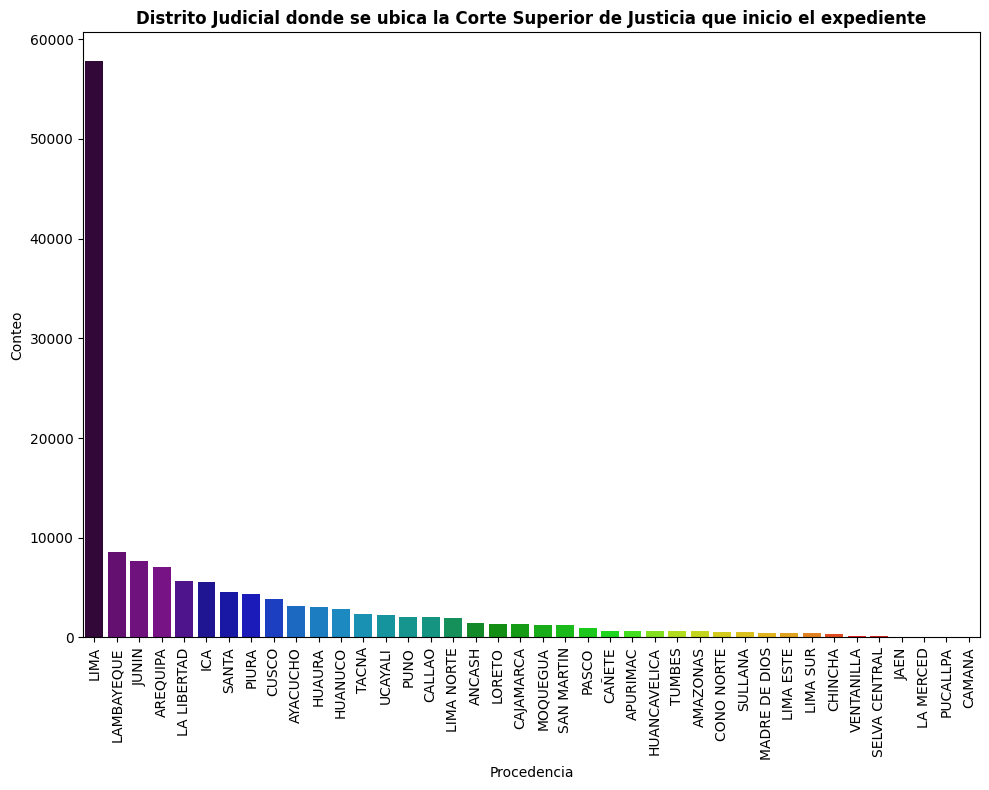

In [192]:
# Distrito Judicial donde se ubica la Corte Superior de Justicia que inicio el expediente
df['PROCEDENCIA'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(data=df_procedencia,x='PROCEDENCIA',y='Conteo',palette="nipy_spectral")
plt.title('Distrito Judicial donde se ubica la Corte Superior de Justicia que inicio el expediente',fontsize=12,weight='bold')
plt.xticks(rotation='vertical')
plt.ylabel('Conteo')
plt.xlabel('Procedencia')
plt.tight_layout()
plt.show()

* La gráfica de barras claramente muestra que el distrito judicial que se repite con mayor frecuencia es el distrito de Lima, con una cantidad significativamente superior a la de los demás distritos. Esta tendencia se debe a la centralización de muchas actividades en Lima y al hecho de que el poder judicial tiene su sede en la capital del país.

In [193]:
fig = px.bar(df_procedencia,x='PROCEDENCIA',y='Conteo',text='Conteo',title='Proceso o tipo de acción relacionado al expediente')
fig.show()

In [195]:
df_tipoproceso=df['CDES_TIPOPROCESO'].value_counts()
df_tipoproceso=pd.DataFrame(df_tipoproceso,index=None)
df_tipoproceso.reset_index(inplace=True)
df_tipoproceso=df_tipoproceso.rename(columns={'count':'Conteo'})
df_tipoproceso.sort_values(by='Conteo',ascending=False,inplace=True,axis=0)
df_tipoproceso.head()

CDES_TIPOPROCESO  Conteo
0        ACCION DE AMPARO   96224
1           HABEAS CORPUS   22099
2  ACCION DE CUMPLIMIENTO   11801
3                   QUEJA    5382
4             HABEAS DATA    2629

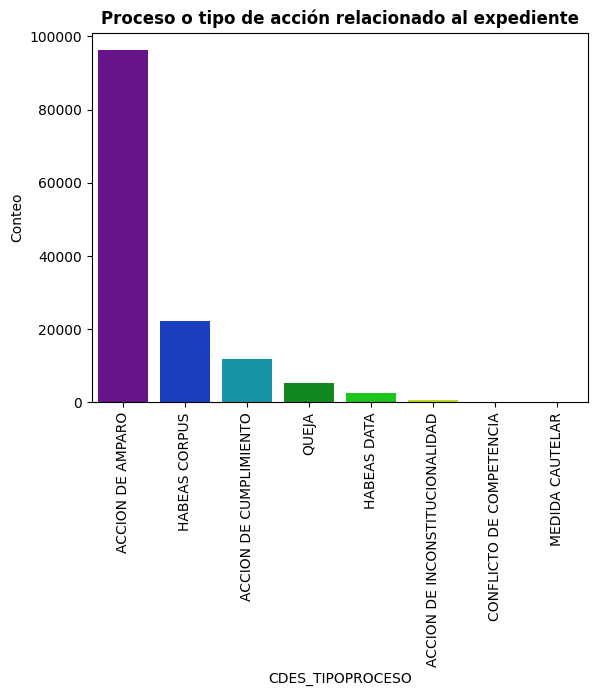

In [196]:
sns.barplot(data=df_tipoproceso,x='CDES_TIPOPROCESO',y='Conteo',palette="nipy_spectral")
plt.xticks(rotation='vertical')
plt.title('Proceso o tipo de acción relacionado al expediente',fontsize=12,weight='bold')
plt.show()

* Según el gráfico de barras, el proceso o tipo de acción que se repite con mayor frecuencia es la Acción de Amparo, con un total de 96,224 casos, seguido de cerca por el Habeas Corpus, que se repite en 22,099 ocasiones.

In [19]:
fig = px.bar(df_tipoproceso, x='CDES_TIPOPROCESO', y='Conteo',text='Conteo',title='Proceso o tipo de acción relacionado al expediente')
fig.show()

**Sala_Origen**

In [197]:
df_salaorigen=df['SALA_ORIGEN'].value_counts()
df_salaorigen=pd.DataFrame(df_salaorigen,index=None)
df_salaorigen.reset_index(inplace=True)
df_salaorigen=df_salaorigen.rename(columns={'count':'Conteo'})
df_salaorigen.sort_values(by='Conteo',ascending=False,inplace=True,axis=0)
df_salaorigen.head()

SALA_ORIGEN  Conteo
0                                                 --   14084
1  PRESIDENTE DE LA SEXTA SALA CIVIL DE LA CORTE ...    5214
2  PRESIDENTE DE LA TERCERA SALA CIVIL DE LA CORT...    5168
3  PRESIDENTE DE LA CUARTA SALA CIVIL DE LA CORTE...    5034
4  PRESIDENTE DE LA PRIMERA SALA CIVIL DE LA CORT...    5011

In [198]:
fig = px.pie(df_salaorigen.iloc[1:10,:], values='Conteo', names='SALA_ORIGEN', title='Distribución de Conteo por Sala de Origen')
fig.show()

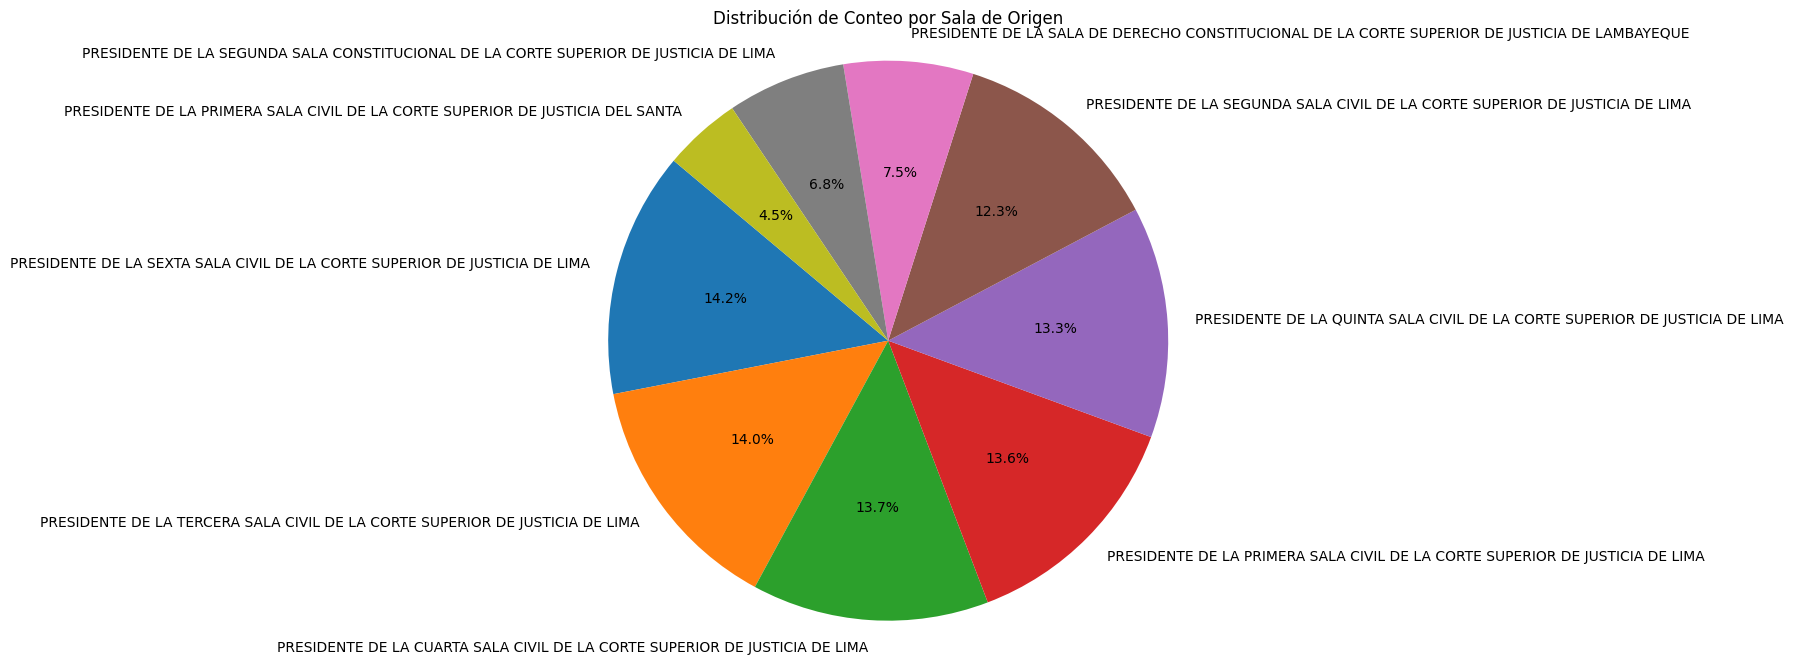

In [201]:
# Obtén los valores y etiquetas
valores = df_salaorigen['Conteo'].iloc[1:10]
etiquetas = df_salaorigen['SALA_ORIGEN'].iloc[1:10]

# Crea el gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Conteo por Sala de Origen')
plt.axis('equal')  # Esto asegura que el gráfico sea un círculo perfecto

# Muestra el gráfico
plt.tight_layout()
plt.show()

* Este grafico circular nos indica en porcentaje la Sala o Corte del Poder Judicial que envia el expediente al TC desde 1922-2023.

**Tipo Demandante**
* Indica tipo de persona demandante. Natural o Juridica

In [22]:
df['TIPO_DEMANDADO'].value_counts()

TIPO_DEMANDADO
JURIDICA    138129
NATURAL        800
--              27
Name: count, dtype: int64

In [202]:
df_tipodemandado=df['TIPO_DEMANDADO'].value_counts()
df_tipodemandado=pd.DataFrame(df_tipodemandado,index=None)
df_tipodemandado.reset_index(inplace=True)
df_tipodemandado=df_tipodemandado.rename(columns={'count':'Conteo'})
df_tipodemandado.sort_values(by='Conteo',ascending=False,inplace=True,axis=0)
df_tipodemandado=df_tipodemandado[df_tipodemandado['TIPO_DEMANDADO']!="--"]
df_tipodemandado.head()

TIPO_DEMANDADO  Conteo
0       JURIDICA  138129
1        NATURAL     800

In [203]:
fig = px.pie(df_tipodemandado, values='Conteo', names='TIPO_DEMANDADO', title='Indica tipo de persona demandante')
fig.show()

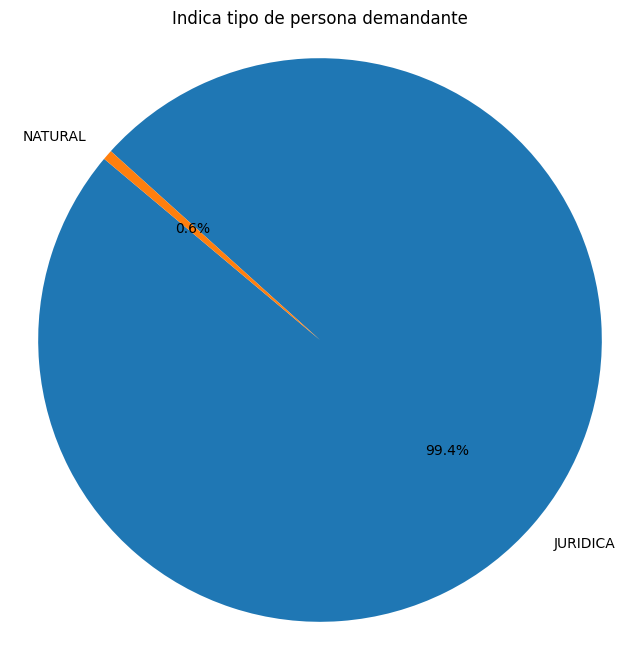

In [204]:
# Obtén los valores y etiquetas
valores = df_tipodemandado['Conteo']
etiquetas = df_tipodemandado['TIPO_DEMANDADO']

# Crea el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Indica tipo de persona demandante')
plt.axis('equal')  # Esto asegura que el gráfico sea un círculo perfecto

# Muestra el gráfico
plt.show()

* Como se puede observar en el gráfico circular, las personas jurídicas representan el 99.4% de las personas demandadas, mientras que las personas naturales constituyen solo el 0.6%.

**Tipo_Demandante**
* Indica tipo de persona demandante. Natural o Juridica

In [25]:
df.columns

Index(['FECHA_INGRESO', 'PROCEDENCIA', 'CDES_TIPOPROCESO', 'SALA_ORIGEN',
       'TIPO_DEMANDANTE', 'TIPO_DEMANDADO', 'SALA', 'FECHA_VISTA', 'MATERIA',
       'PUB_PAGWEB', 'PUB_PERUANO', 'FALLO', 'FECHA_DEVPJ', 'FECHA_CORTE'],
      dtype='object')

In [205]:
df_tipodemandante=df['TIPO_DEMANDANTE'].value_counts()
df_tipodemandante=pd.DataFrame(df_tipodemandante,index=None)
df_tipodemandante.reset_index(inplace=True)
df_tipodemandante=df_tipodemandante.rename(columns={'count':'Conteo'})
df_tipodemandante.sort_values(by='Conteo',ascending=False,inplace=True,axis=0)
df_tipodemandante=df_tipodemandante[df_tipodemandante['TIPO_DEMANDANTE']!="--"]
df_tipodemandante.head()

TIPO_DEMANDANTE  Conteo
0         NATURAL  132606
1        JURIDICA    6333

In [208]:
fig = px.pie(df_tipodemandante, values='Conteo', names='TIPO_DEMANDANTE', title='Indica tipo de persona demandante')
fig.show()

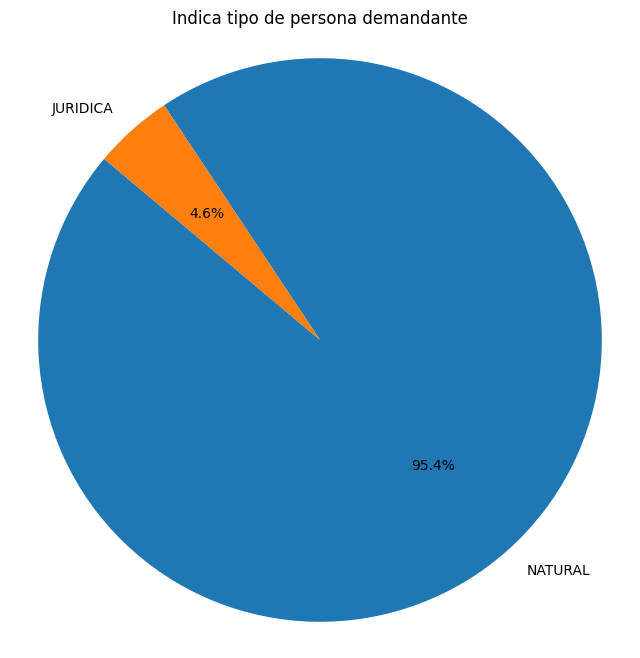

In [209]:
# Obtén los valores y etiquetas
valores = df_tipodemandante['Conteo']
etiquetas = df_tipodemandante['TIPO_DEMANDANTE']

# Crea el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Indica tipo de persona demandante')
plt.axis('equal')  # Esto asegura que el gráfico sea un círculo perfecto

# Muestra el gráfico
plt.show()

* Como se puede observar en el gráfico circular, las personas natural representan el 95.4% de las personas demandante, mientras que las personas naturales constituyen solo el 4.6%.

**Salsa**
* Colegiado que reviso el expediente. Puede ser Pleno, Sala1 o Sala2


In [210]:
df_sala=df['SALA'].value_counts()
df_sala=pd.DataFrame(df_sala,index=None)
df_sala.reset_index(inplace=True)
df_sala=df_sala.rename(columns={'count':'Conteo'})
df_sala.sort_values(by='Conteo',ascending=False,inplace=True,axis=0)
df_sala=df_sala[df_sala['SALA']!="--"]
df_sala.head()

SALA  Conteo
0       SALA 1   59994
1       SALA 2   50362
2        PLENO   16540
4  NO DEFINIDO     260

In [221]:
fig = px.bar(df_sala, x='SALA', y='Conteo',text='Conteo',title='Tipo de Sala',template='plotly_dark')
fig.show()

El gráfico de barras muestra que la mayoría que los Colegiado que reviso el expediente provienen de la Sala 1, seguida por la Sala 2 y, en última instancia, el Pleno.

**MATERIA**
* Materia motivo del expediente

In [212]:
df_materia=df['MATERIA'].value_counts()
df_materia=pd.DataFrame(df_materia,index=None)
df_materia.reset_index(inplace=True)
df_materia=df_materia.rename(columns={'count':'Conteo'})
df_materia.sort_values(by='Conteo',ascending=False,inplace=True,axis=0)
df_materia

MATERIA  Conteo
0                                                  --   40058
1                                             Laboral   24535
2                                         Previsional   23035
3                             Resoluciones judiciales   16980
4   Debido Proceso/ garant¡as procesales / otros t...   12894
5                                  Asuntos especiales    6259
6                                      Administrativo    3830
7                                          Tributario    1965
8                                Supuestos ordinarios    1895
9                             Acceso a la informaci¢n    1867
10       Otros supuestos de protecci¢n constitucional    1271
11                               Libertad de transito    1257
12                               Supuestos especiales    1091
13                                          Detenci¢n     825
14     Protecci¢n de la autodeterminaci¢n informativa     492
15            Condiciones y administraci¢n carcelaria     349
16                          Beneficios penitenciarios     262
17                                Ordenanza Municipal      21
18                                Decreto Legislativo      17
19                                      Ley Ordinaria      11
20                      Entre àrganos del Mismo Nivel       8
21                                Decreto de Urgencia       6
22                                        No definido       6
23                                 Ordenanza Regional       4
24                      Ley de Reforma Constitucional       3
25                                              Otros       3
28                                       Ley Org nica       2
26                            Reglamento del Congreso       2
27                    Entre àrganos de Nivel Distinto       2
29                                 Ley de Presupuesto       1
30                     Entre ¢rganos constitucionales       1
31                      Entre gob. Locales y regional       1
32                                    Ordenanza Local       1
33                                        Decreto Ley       1
34                             Resoluci¢n Legislativa       1

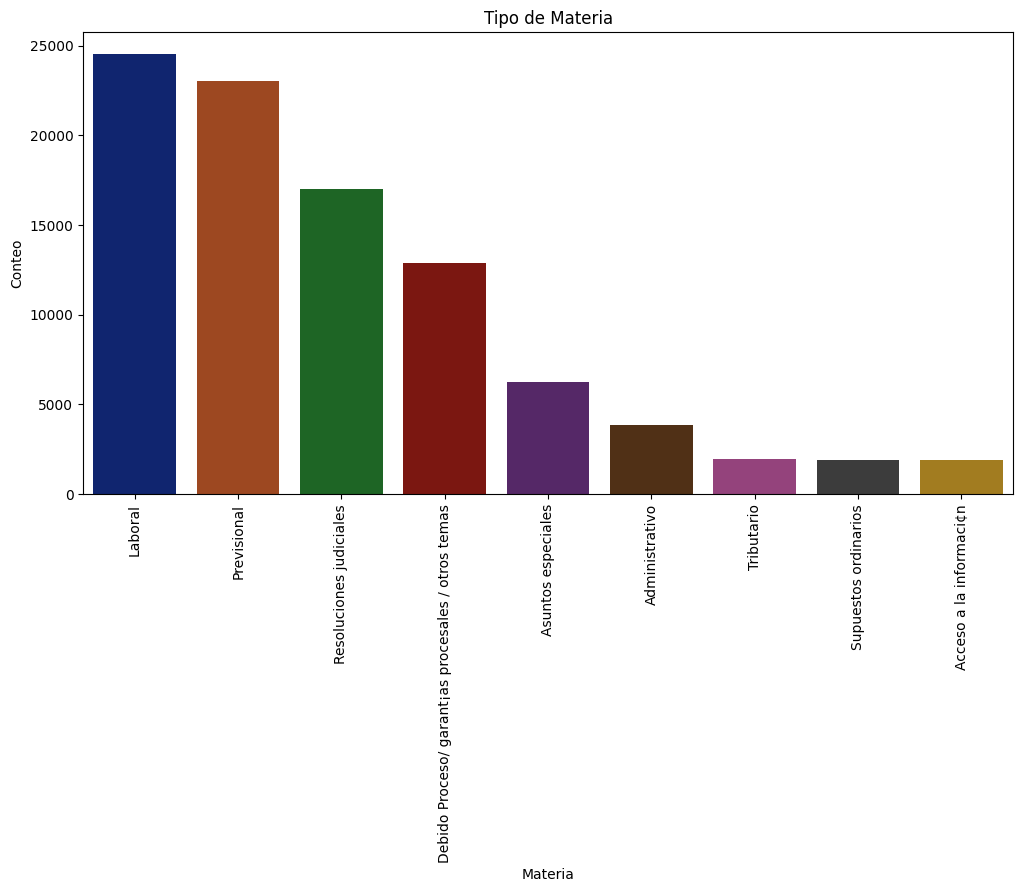

In [219]:
# Filtra los datos para tomar solo las primeras 10 filas
df_materia_filtrado = df_materia.iloc[1:10, :]
# Crea el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.barplot(x='MATERIA', y='Conteo', data=df_materia_filtrado, palette='dark')
plt.title('Tipo de Materia')
plt.xlabel('Materia')
plt.ylabel('Conteo')
plt.xticks(rotation='vertical')
# Muestra el gráfico de barras
plt.show()


In [213]:
fig = px.bar(df_materia.iloc[1:10,:], x='MATERIA', y='Conteo',text='Conteo',title='Tipo de Materia',template='plotly_dark')
fig.show()

* Materia motivo del expediente que mas se repite segun la grafica de barras el el laboral y luego le sigue previsional.

In [214]:
# Numero de Fallos
df_fallo=df['FALLO'].value_counts()
df_fallo=pd.DataFrame(df_fallo,index=None)
df_fallo.reset_index(inplace=True)
df_fallo=df_fallo.rename(columns={'count':'Conteo'})
df_fallo.sort_values(by='Conteo',ascending=False,inplace=True,axis=0)
df_fallo

FALLO  Conteo
0                                --   56941
1                      Improcedente   29800
2   Improcedente por Interlocutoria   29216
3                         Infundada    9420
4                           Fundada    7295
5                   Admitir Demanda    1869
6                              Nulo     969
7                Infundada en Parte     969
8                  Fundada en Parte     953
9                     Desistimiento     586
10              Improcedente el RAC     313
11                       Devuelvase     271
12                   Fundado el RAC     104
13                 Infundado el RAC     101
14                      Inadmisible      65
15                        Revocaron      27
16                       Sin Objeto      25
17                      Notifiquese      12
18                          Admitir      11
19                      Transacci¢n       3
20                       Abandonada       2
21                      No Presenta       2
22        Sustraccion de la Materia       1
23                      Subsanaci¢n       1

In [216]:
fig = px.bar(df_fallo.iloc[1:,:], x='FALLO', y='Conteo',text='Conteo',title='Tipo de Fallo',template='plotly_dark')
fig.show()

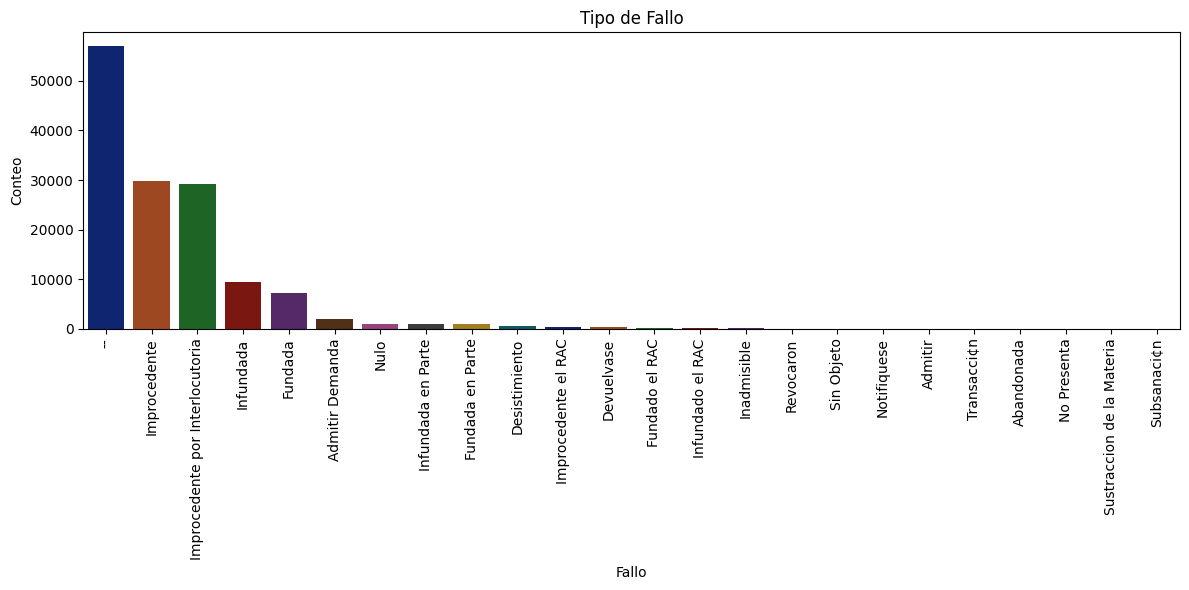

In [223]:
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.barplot(x='FALLO', y='Conteo', data=df_fallo, palette='dark')
plt.title('Tipo de Fallo')
plt.xlabel('Fallo')
plt.ylabel('Conteo')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad

# Muestra el gráfico de barras
plt.tight_layout()
plt.show()

## **Limpieza de la Tabla**

* (De 1992 hasta el 2012 se utilizaba el antiguo sistema de gestión de expedientes en 2012 se migro al actual, en algunos casos los datos del fallo, materia, sala de origen y colegiado no fueron capturados correctamente)

In [226]:
# convertimos los valores de la tabla tipo "--" a nan
df_nulls=df.replace("--",np.nan)
df_nulls.head()

FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO SALA_ORIGEN TIPO_DEMANDANTE  \
0       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
1       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
2       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
3       19920120      CAMANA  ACCION DE AMPARO         NaN         NATURAL   
4       19920120      CAMANA  ACCION DE AMPARO         NaN         NATURAL   

  TIPO_DEMANDADO SALA FECHA_VISTA MATERIA PUB_PAGWEB PUB_PERUANO FALLO  \
0       JURIDICA  NaN         NaN     NaN   19990513         NaN   NaN   
1       JURIDICA  NaN         NaN     NaN   19990426         NaN   NaN   
2       JURIDICA  NaN         NaN     NaN   20010911         NaN   NaN   
3       JURIDICA  NaN         NaN     NaN   19990421         NaN   NaN   
4       JURIDICA  NaN         NaN     NaN        NaN         NaN   NaN   

  FECHA_DEVPJ  FECHA_CORTE  
0         NaN     20230630  
1         NaN     20230630  
2         NaN     20230630  
3    19990526     20230630  
4         NaN     20230630

<Axes: >

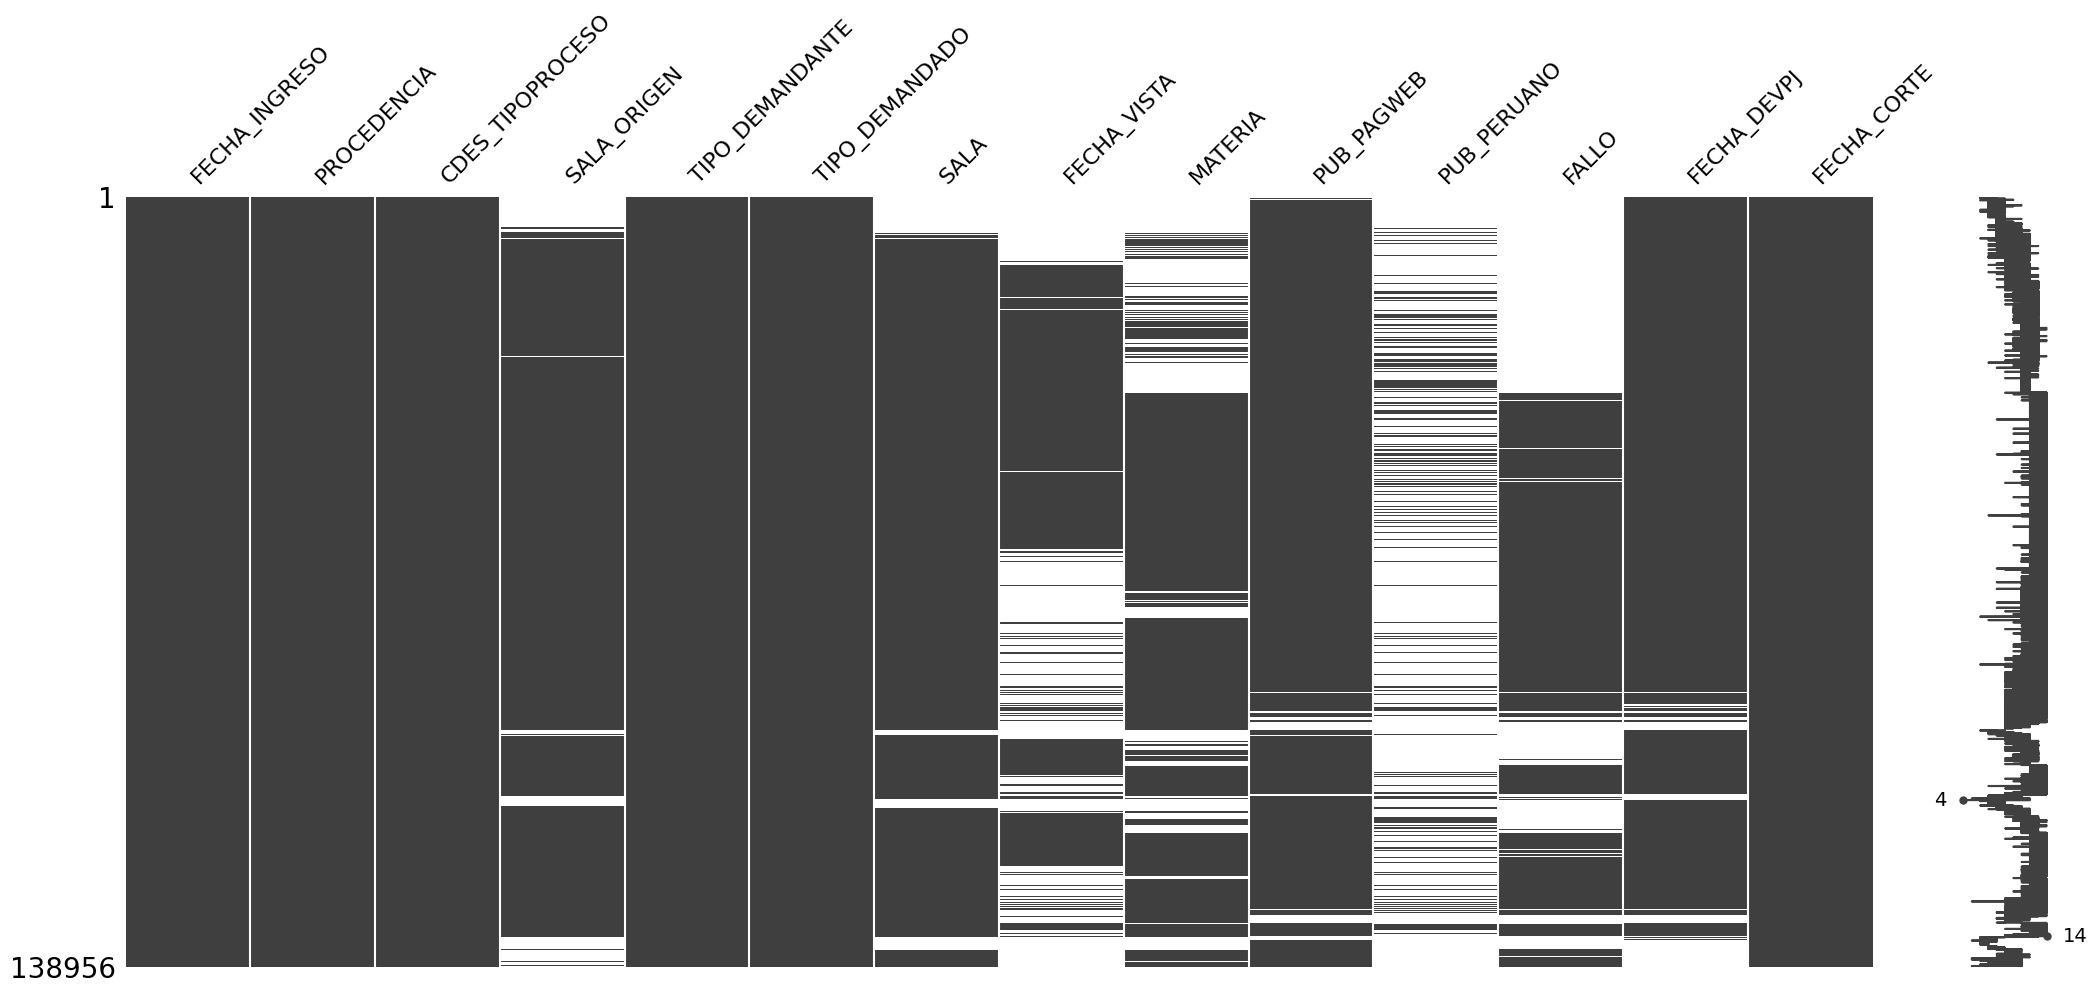

In [227]:
msno.matrix(df_nulls)

<Axes: >

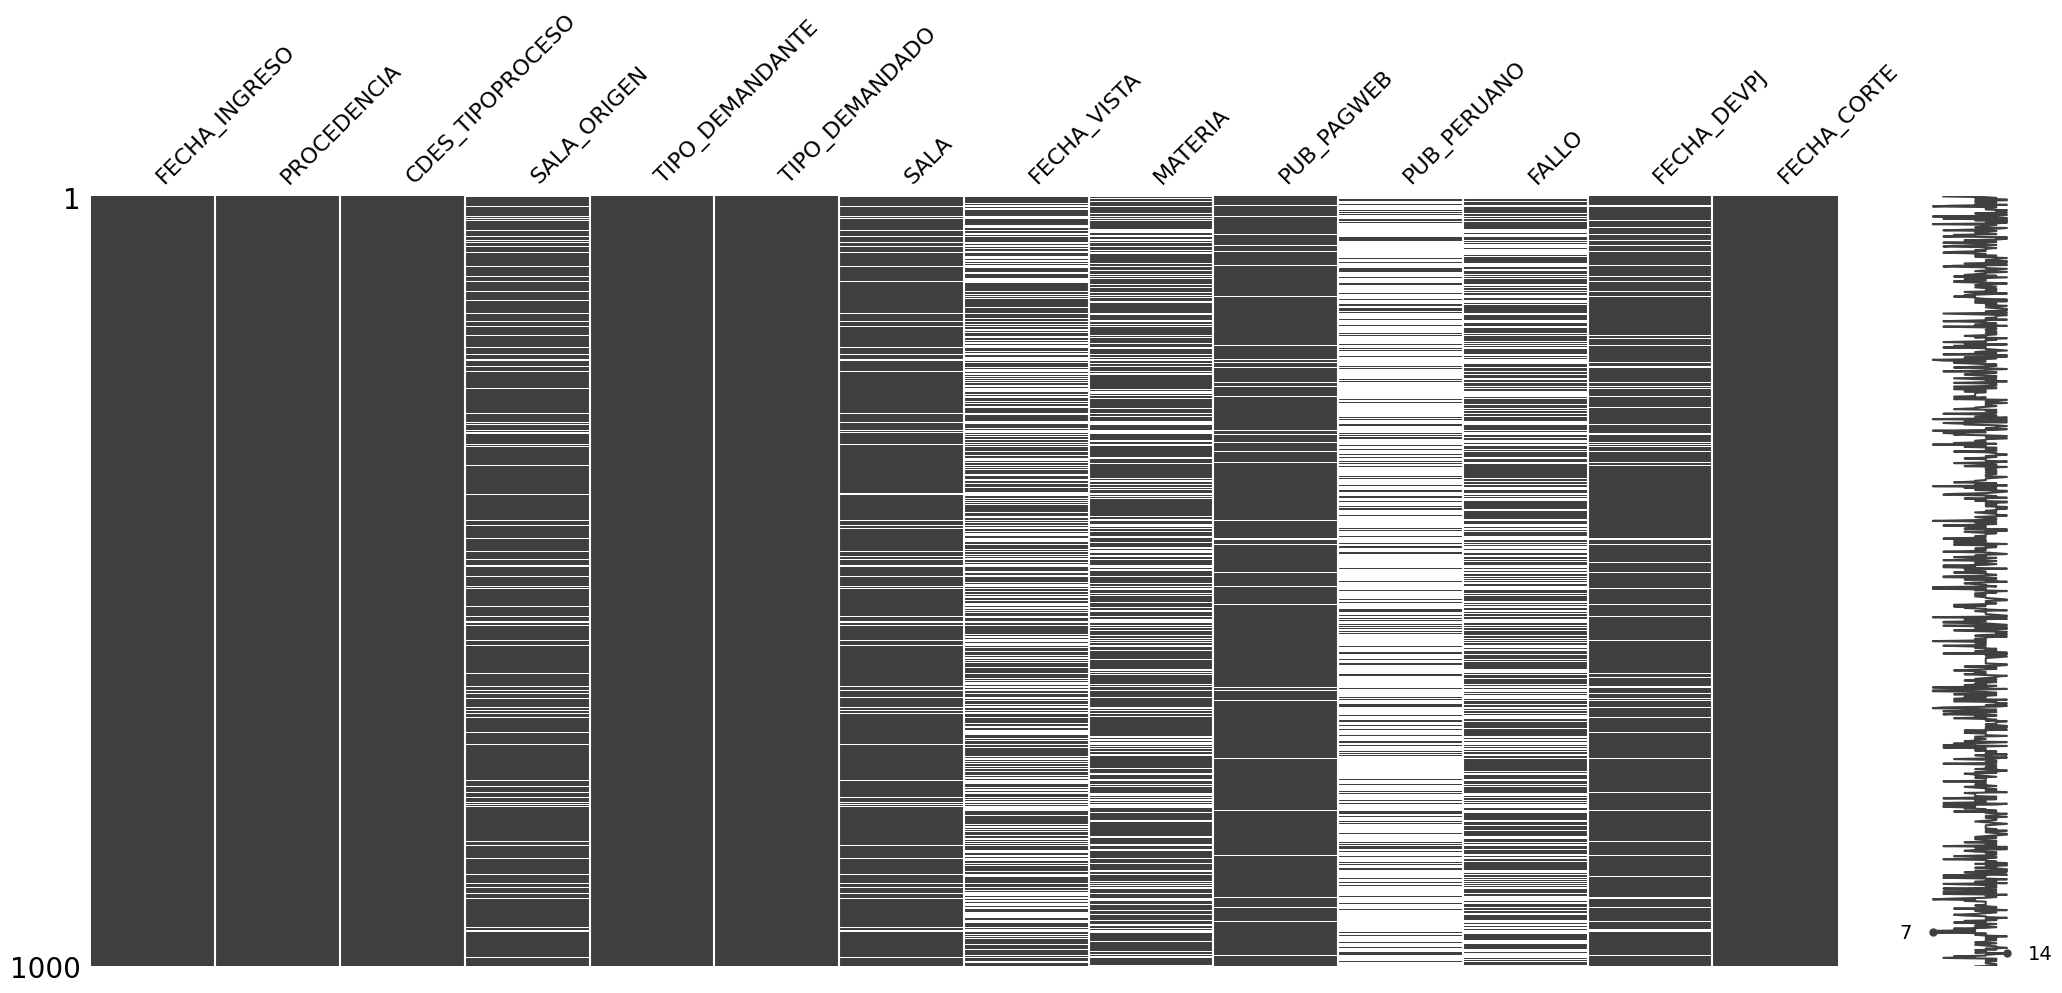

In [228]:
# Analisis con 1000 filas al azar
msno.matrix(df_nulls.sample(1000))

<Axes: >

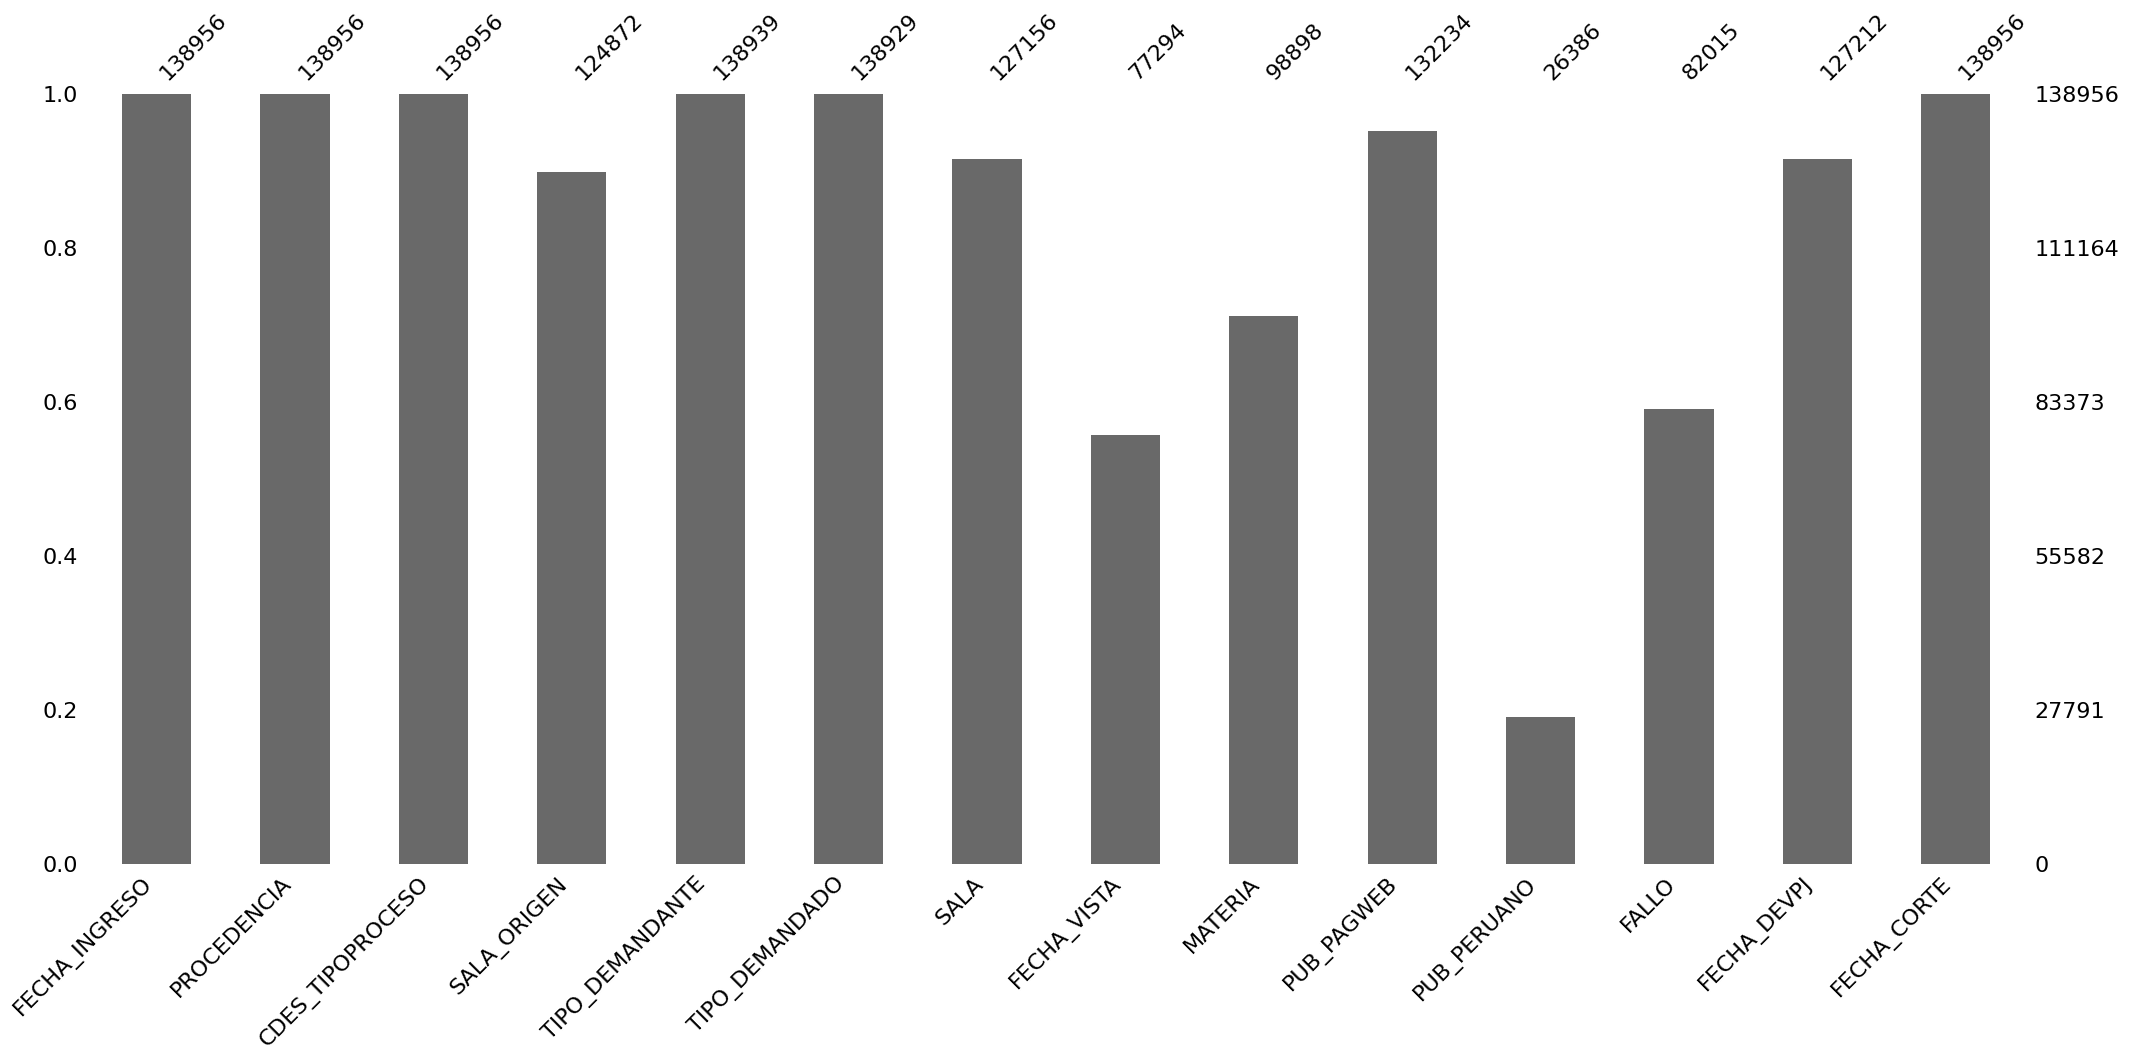

In [229]:
msno.bar(df_nulls)

<Axes: >

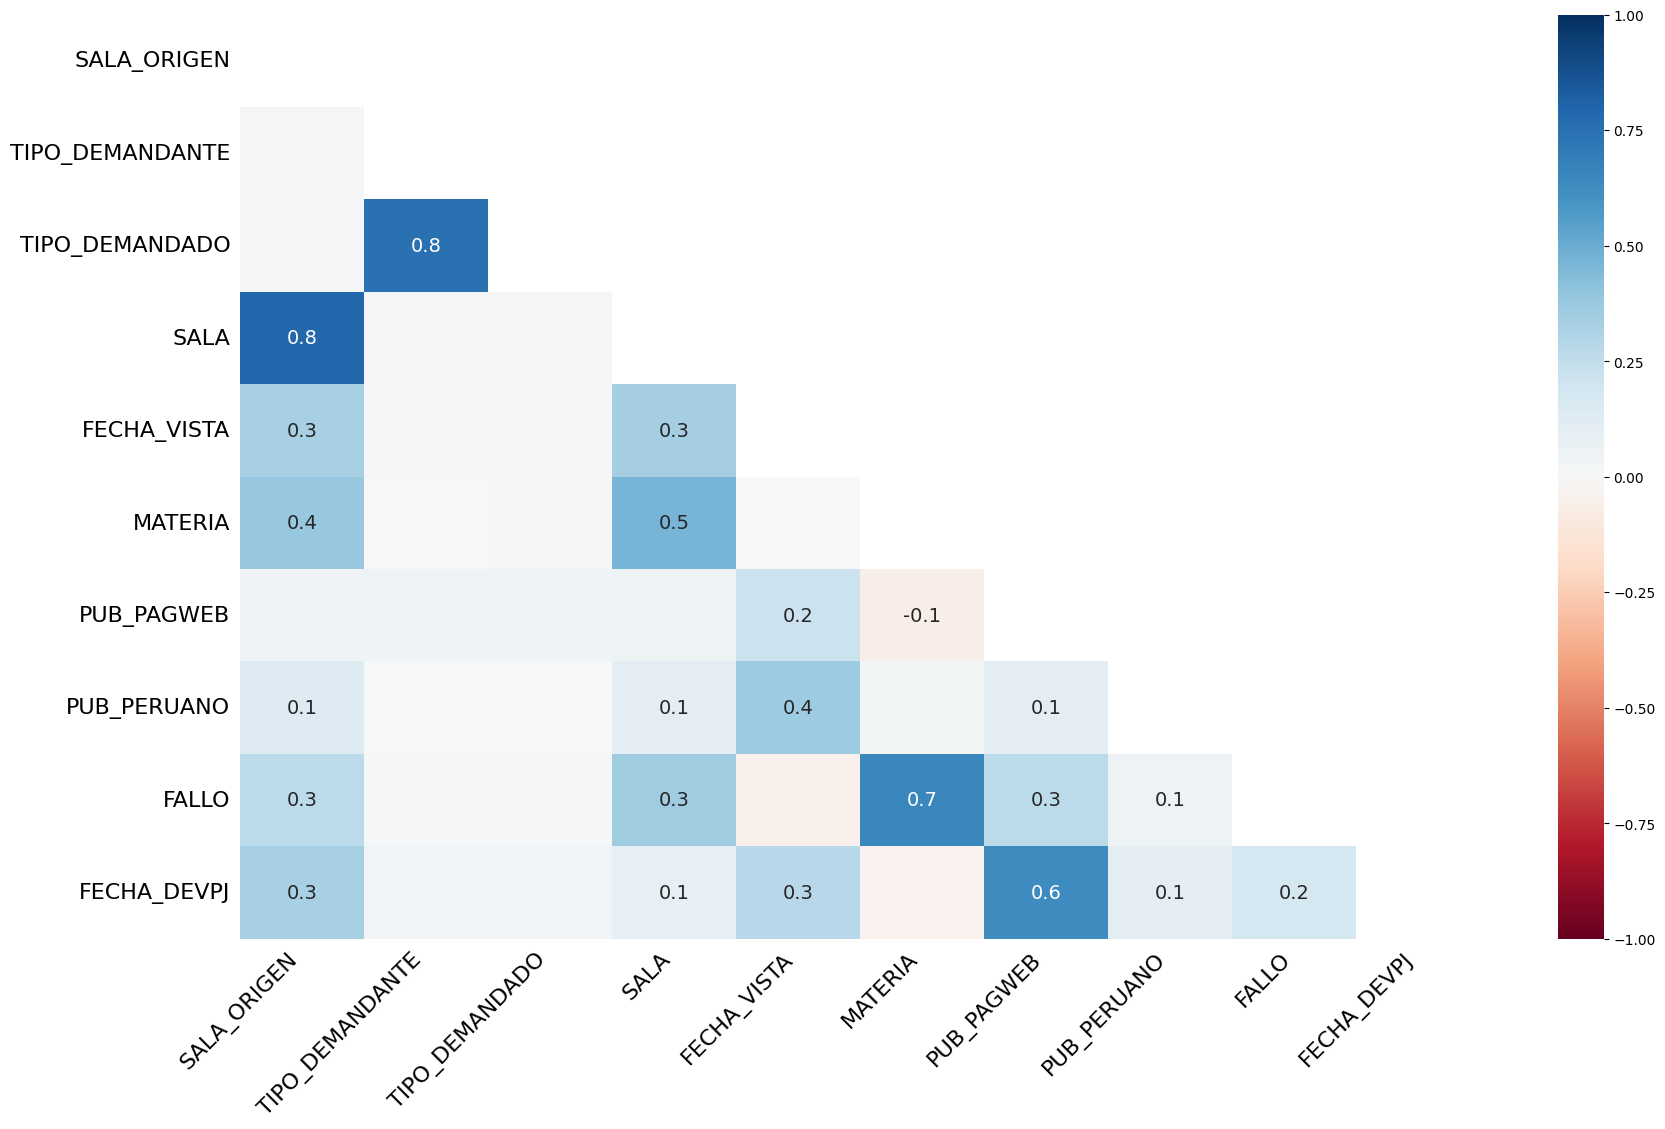

In [39]:
# The missingno correlation heatmap measures nullity correlation: how strongly 
# the presence or absence of one variable affects the presence of another:
msno.heatmap(df_nulls)

<Axes: >

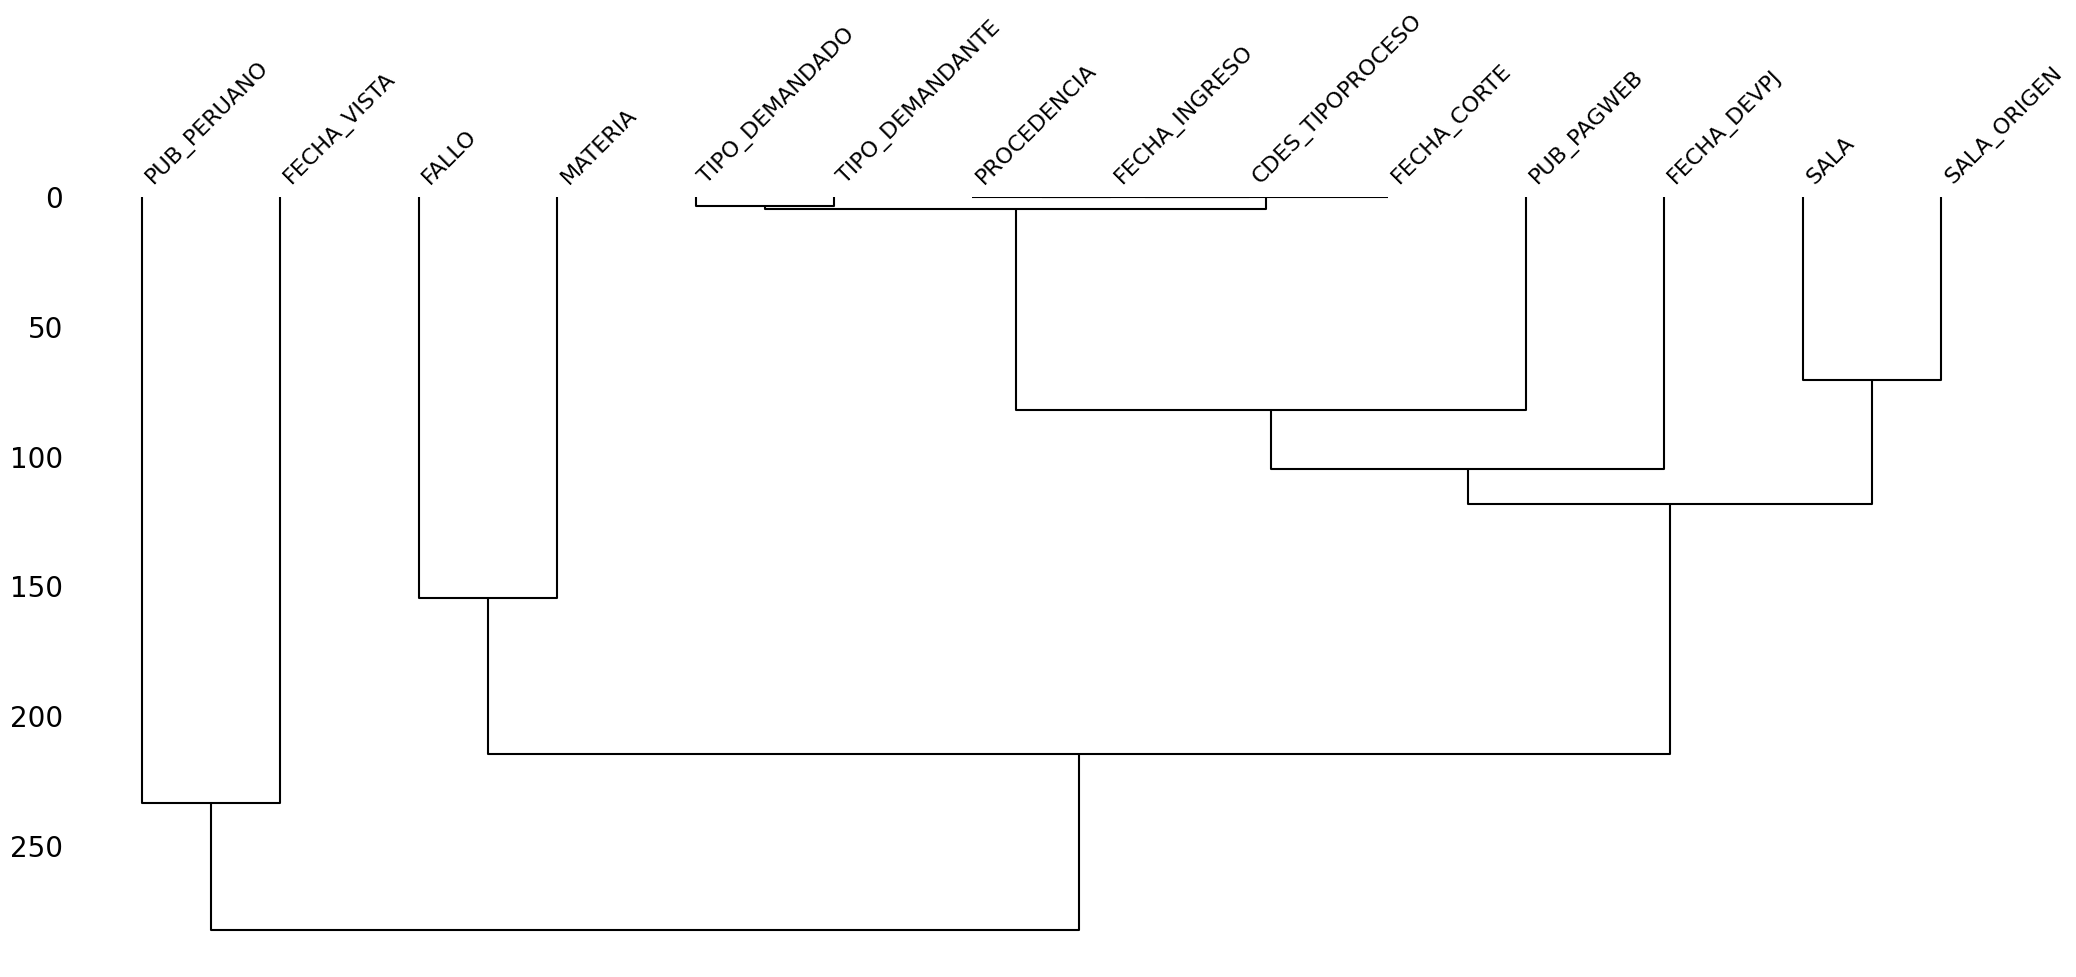

In [230]:
# The dendrogram allows you to more fully correlate variable completion, 
# revealing trends deeper than the pairwise ones visible in the correlation heatmap:
msno.dendrogram(df_nulls)

In [231]:
# Crea un DataFrame llamado "null_values" para almacenar información sobre los valores nulos en "df_nulls"
null_values = pd.DataFrame(df_nulls.isnull().sum(), columns=['Null Values'])  # Calcula la cantidad de valores nulos por columna

# Calcula el porcentaje de valores nulos en cada columna y agrega esta información al DataFrame "null_values"
null_values['% Missing Values'] = (df_nulls.isna().sum() / len(df_nulls) * 100)  # Calcula el porcentaje de valores nulos

# Filtra las filas en "null_values" para mostrar solo las columnas con valores nulos
null_values = null_values[null_values['% Missing Values'] > 0]

# Estiliza el DataFrame "null_values" para resaltar los valores faltantes utilizando un gradiente de colores
null_values.style.background_gradient(cmap='viridis', low=0.2, high=0.1)


In [232]:
# Procedemos a eliminar la columna "PUB_PERUANO" debido a la gran cantidad de datos vacíos que contiene.
# Además, la información sobre la publicación en el diario peruano es muy similar a la columna 
# de publicación en la página web.
# Por este motivo, utilizaremos la columna de "publicación en la página web" 
# ya que contiene una mayor cantidad de datos y proporcionará una base más sólida para nuestro análisis.

df_nulls.drop('PUB_PERUANO',axis=1,inplace=True)
new_df2=df_nulls
new_df2.head()

FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO SALA_ORIGEN TIPO_DEMANDANTE  \
0       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
1       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
2       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
3       19920120      CAMANA  ACCION DE AMPARO         NaN         NATURAL   
4       19920120      CAMANA  ACCION DE AMPARO         NaN         NATURAL   

  TIPO_DEMANDADO SALA FECHA_VISTA MATERIA PUB_PAGWEB FALLO FECHA_DEVPJ  \
0       JURIDICA  NaN         NaN     NaN   19990513   NaN         NaN   
1       JURIDICA  NaN         NaN     NaN   19990426   NaN         NaN   
2       JURIDICA  NaN         NaN     NaN   20010911   NaN         NaN   
3       JURIDICA  NaN         NaN     NaN   19990421   NaN    19990526   
4       JURIDICA  NaN         NaN     NaN        NaN   NaN         NaN   

   FECHA_CORTE  
0     20230630  
1     20230630  
2     20230630  
3     20230630  
4     20230630

In [234]:
# Creamos un nuevo DataFrame llamado "mismos_tipos" que contiene las filas de "new_df2" 
# donde los valores en las columnas 'TIPO_DEMANDANTE' y 'TIPO_DEMANDADO' son iguales.
mismos_tipos = new_df2[new_df2['TIPO_DEMANDANTE'] == new_df2['TIPO_DEMANDADO']]

# Mostramos las filas en "mismos_tipos" donde los valores son iguales en ambas columnas.
mismos_tipos.head()


FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO  \
49155       20110309      LORETO  ACCION DE AMPARO   
49164       20110309      LORETO  ACCION DE AMPARO   
49770       20110428        LIMA  ACCION DE AMPARO   
50528       20110712        LIMA  ACCION DE AMPARO   
51182       20110906        PUNO  ACCION DE AMPARO   

                                             SALA_ORIGEN TIPO_DEMANDANTE  \
49155  PRESIDENTE DE LA SALA CIVIL MIXTA DE LA CORTE ...         NATURAL   
49164  PRESIDENTE DE LA SALA CIVIL MIXTA DE LA CORTE ...         NATURAL   
49770  PRESIDENTE DE LA QUINTA SALA CIVIL DE LA CORTE...         NATURAL   
50528  PRESIDENTE DE LA SALA CONSTITUCIONAL Y SOCIAL ...        JURIDICA   
51182  PRESIDENTE DE LA SALA CIVIL DE LA CORTE SUPERI...         NATURAL   

      TIPO_DEMANDADO    SALA FECHA_VISTA                  MATERIA PUB_PAGWEB  \
49155        NATURAL  SALA 1  28/03/2011                  Laboral   20130327   
49164        NATURAL  SALA 1  28/03/2011                  Laboral   20120713   
49770        NATURAL   PLENO  23/07/2014  Resoluciones judiciales   20160530   
50528       JURIDICA   PLENO   5/10/2011  Resoluciones judiciales   20140310   
51182        NATURAL  SALA 2  21/10/2011  Resoluciones judiciales   20130605   

              FALLO FECHA_DEVPJ  FECHA_CORTE  
49155       Fundada    20130424     20230630  
49164       Fundada    20120802     20230630  
49770  Improcedente    20160615     20230630  
50528     Infundada    20140506     20230630  
51182       Fundada    20130620     20230630

In [237]:
# Creamos un nuevo DataFrame llamado "diferentes_tipos" que contiene las filas de "new_df2" 
# donde los valores en las columnas 'TIPO_DEMANDANTE' y 'TIPO_DEMANDADO' son diferentes.
diferentes_tipos = new_df2[new_df2['TIPO_DEMANDANTE'] != new_df2['TIPO_DEMANDADO']]

# Mostramos las filas en "diferentes_tipos" donde los valores son diferentes en ambas columnas.
diferentes_tipos.head()


FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO SALA_ORIGEN TIPO_DEMANDANTE  \
0       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
1       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
2       19920101        LIMA  ACCION DE AMPARO         NaN         NATURAL   
3       19920120      CAMANA  ACCION DE AMPARO         NaN         NATURAL   
4       19920120      CAMANA  ACCION DE AMPARO         NaN         NATURAL   

  TIPO_DEMANDADO SALA FECHA_VISTA MATERIA PUB_PAGWEB FALLO FECHA_DEVPJ  \
0       JURIDICA  NaN         NaN     NaN   19990513   NaN         NaN   
1       JURIDICA  NaN         NaN     NaN   19990426   NaN         NaN   
2       JURIDICA  NaN         NaN     NaN   20010911   NaN         NaN   
3       JURIDICA  NaN         NaN     NaN   19990421   NaN    19990526   
4       JURIDICA  NaN         NaN     NaN        NaN   NaN         NaN   

   FECHA_CORTE  
0     20230630  
1     20230630  
2     20230630  
3     20230630  
4     20230630

In [238]:
# Elimina las filas donde la columna 'TIPO_DEMANDANTE' tiene valores nulos.
new_df2.dropna(subset=['TIPO_DEMANDANTE'], inplace=True)

# Elimina las filas donde la columna 'TIPO_DEMANDADO' tiene valores nulos.
new_df2.dropna(subset=['TIPO_DEMANDADO'], inplace=True)

# Convierte la columna 'FECHA_INGRESO' en un formato de fecha específico ('%Y%m%d').
new_df2['FECHA_INGRESO'] = pd.to_datetime(new_df2['FECHA_INGRESO'], format='%Y%m%d')

# Convierte la columna 'PUB_PAGWEB' en un formato de fecha específico ('%Y%m%d').
new_df2['PUB_PAGWEB'] = pd.to_datetime(new_df2['PUB_PAGWEB'], format='%Y%m%d')

# Convierte la columna 'FECHA_DEVPJ' en un formato de fecha específico ('%Y%m%d').
new_df2['FECHA_DEVPJ'] = pd.to_datetime(new_df2['FECHA_DEVPJ'], format='%Y%m%d')

# Convierte la columna 'FECHA_VISTA' en un formato de fecha específico ('%d/%m/%Y').
new_df2["FECHA_VISTA"] = pd.to_datetime(new_df2["FECHA_VISTA"], format='%d/%m/%Y')

# Elimina la columna 'FECHA_CORTE' del DataFrame.
new_df2.drop('FECHA_CORTE', axis=1, inplace=True)

# Reinicia el índice del DataFrame.
new_df2.reset_index(inplace=True)

# Elimina la columna 'index' generada al reiniciar el índice, ya que no es necesaria.
new_df2.drop('index', axis=1, inplace=True)

# Muestra las primeras filas del DataFrame "new_df2".
new_df2.head()


FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO SALA_ORIGEN TIPO_DEMANDANTE  \
0    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
1    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
2    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
3    1992-01-20      CAMANA  ACCION DE AMPARO         NaN         NATURAL   
4    1992-01-20      CAMANA  ACCION DE AMPARO         NaN         NATURAL   

  TIPO_DEMANDADO SALA FECHA_VISTA MATERIA PUB_PAGWEB FALLO FECHA_DEVPJ  
0       JURIDICA  NaN         NaT     NaN 1999-05-13   NaN         NaT  
1       JURIDICA  NaN         NaT     NaN 1999-04-26   NaN         NaT  
2       JURIDICA  NaN         NaT     NaN 2001-09-11   NaN         NaT  
3       JURIDICA  NaN         NaT     NaN 1999-04-21   NaN  1999-05-26  
4       JURIDICA  NaN         NaT     NaN        NaT   NaN         NaT

In [239]:
new_df2.shape

(138928, 12)

In [240]:
# Convierte la columna 'FECHA_INGRESO' en un formato de fecha específico ('%Y%m%d').
new_df2['FECHA_INGRESO'] = pd.to_datetime(new_df2['FECHA_INGRESO'], format='%Y%m%d')

# Convierte la columna 'PUB_PAGWEB' en un formato de fecha específico ('%Y%m%d').
new_df2['PUB_PAGWEB'] = pd.to_datetime(new_df2['PUB_PAGWEB'], format='%Y%m%d')

# Convierte la columna 'FECHA_DEVPJ' en un formato de fecha específico ('%Y%m%d').
new_df2['FECHA_DEVPJ'] = pd.to_datetime(new_df2['FECHA_DEVPJ'], format='%Y%m%d')

# Convierte la columna 'FECHA_VISTA' en un formato de fecha específico ('%d/%m/%Y').
new_df2["FECHA_VISTA"] = pd.to_datetime(new_df2["FECHA_VISTA"], format='%d/%m/%Y')

# Reinicia el índice del DataFrame.
new_df2.reset_index(inplace=True)

# Elimina la columna 'index' generada al reiniciar el índice, ya que no es necesaria.
new_df2.drop('index', axis=1, inplace=True)

# Muestra las primeras filas del DataFrame "new_df2".
new_df2.head()


FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO SALA_ORIGEN TIPO_DEMANDANTE  \
0    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
1    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
2    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
3    1992-01-20      CAMANA  ACCION DE AMPARO         NaN         NATURAL   
4    1992-01-20      CAMANA  ACCION DE AMPARO         NaN         NATURAL   

  TIPO_DEMANDADO SALA FECHA_VISTA MATERIA PUB_PAGWEB FALLO FECHA_DEVPJ  
0       JURIDICA  NaN         NaT     NaN 1999-05-13   NaN         NaT  
1       JURIDICA  NaN         NaT     NaN 1999-04-26   NaN         NaT  
2       JURIDICA  NaN         NaT     NaN 2001-09-11   NaN         NaT  
3       JURIDICA  NaN         NaT     NaN 1999-04-21   NaN  1999-05-26  
4       JURIDICA  NaN         NaT     NaN        NaT   NaN         NaT

In [241]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138928 entries, 0 to 138927
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FECHA_INGRESO     138928 non-null  datetime64[ns]
 1   PROCEDENCIA       138928 non-null  object        
 2   CDES_TIPOPROCESO  138928 non-null  object        
 3   SALA_ORIGEN       124859 non-null  object        
 4   TIPO_DEMANDANTE   138928 non-null  object        
 5   TIPO_DEMANDADO    138928 non-null  object        
 6   SALA              127139 non-null  object        
 7   FECHA_VISTA       77292 non-null   datetime64[ns]
 8   MATERIA           98889 non-null   object        
 9   PUB_PAGWEB        132226 non-null  datetime64[ns]
 10  FALLO             82013 non-null   object        
 11  FECHA_DEVPJ       127207 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(8)
memory usage: 12.7+ MB


In [242]:
# Calcula la diferencia entre las columnas 'FECHA_VISTA' y 'FECHA_INGRESO' y almacena los resultados en una nueva columna 'DIA_FECHA_VISTA'.
new_df2['DIA_FECHA_VISTA'] = new_df2['FECHA_VISTA'] - new_df2['FECHA_INGRESO']

# Extrae el número de días de la diferencia calculada en 'DIA_FECHA_VISTA' y actualiza la columna con los valores en días.
new_df2['DIA_FECHA_VISTA'] = new_df2['DIA_FECHA_VISTA'].dt.days

# Calcula la diferencia entre las columnas 'FECHA_DEVPJ' y 'FECHA_INGRESO' y almacena los resultados en una nueva columna 'DIA_FECHA_DEVPJ'.
new_df2['DIA_FECHA_DEVPJ'] = new_df2['FECHA_DEVPJ'] - new_df2['FECHA_INGRESO']

# Extrae el número de días de la diferencia calculada en 'DIA_FECHA_DEVPJ' y actualiza la columna con los valores en días.
new_df2['DIA_FECHA_DEVPJ'] = new_df2['DIA_FECHA_DEVPJ'].dt.days

# Calcula la diferencia entre las columnas 'PUB_PAGWEB' y 'FECHA_INGRESO' y almacena los resultados en una nueva columna 'DIA_PUB_PAGWEB'.
new_df2['DIA_PUB_PAGWEB'] = new_df2['PUB_PAGWEB'] - new_df2['FECHA_INGRESO']

# Extrae el número de días de la diferencia calculada en 'DIA_PUB_PAGWEB' y actualiza la columna con los valores en días.
new_df2['DIA_PUB_PAGWEB'] = new_df2['DIA_PUB_PAGWEB'].dt.days

# Muestra las primeras filas del DataFrame "new_df2".
new_df2.head()


FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO SALA_ORIGEN TIPO_DEMANDANTE  \
0    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
1    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
2    1992-01-01        LIMA  ACCION DE AMPARO         NaN         NATURAL   
3    1992-01-20      CAMANA  ACCION DE AMPARO         NaN         NATURAL   
4    1992-01-20      CAMANA  ACCION DE AMPARO         NaN         NATURAL   

  TIPO_DEMANDADO SALA FECHA_VISTA MATERIA PUB_PAGWEB FALLO FECHA_DEVPJ  \
0       JURIDICA  NaN         NaT     NaN 1999-05-13   NaN         NaT   
1       JURIDICA  NaN         NaT     NaN 1999-04-26   NaN         NaT   
2       JURIDICA  NaN         NaT     NaN 2001-09-11   NaN         NaT   
3       JURIDICA  NaN         NaT     NaN 1999-04-21   NaN  1999-05-26   
4       JURIDICA  NaN         NaT     NaN        NaT   NaN         NaT   

   DIA_FECHA_VISTA  DIA_FECHA_DEVPJ  DIA_PUB_PAGWEB  
0              NaN              NaN          2689.0  
1              NaN              NaN          2672.0  
2              NaN              NaN          3541.0  
3              NaN           2683.0          2648.0  
4              NaN              NaN             NaN

In [243]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138928 entries, 0 to 138927
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FECHA_INGRESO     138928 non-null  datetime64[ns]
 1   PROCEDENCIA       138928 non-null  object        
 2   CDES_TIPOPROCESO  138928 non-null  object        
 3   SALA_ORIGEN       124859 non-null  object        
 4   TIPO_DEMANDANTE   138928 non-null  object        
 5   TIPO_DEMANDADO    138928 non-null  object        
 6   SALA              127139 non-null  object        
 7   FECHA_VISTA       77292 non-null   datetime64[ns]
 8   MATERIA           98889 non-null   object        
 9   PUB_PAGWEB        132226 non-null  datetime64[ns]
 10  FALLO             82013 non-null   object        
 11  FECHA_DEVPJ       127207 non-null  datetime64[ns]
 12  DIA_FECHA_VISTA   77292 non-null   float64       
 13  DIA_FECHA_DEVPJ   127207 non-null  float64       
 14  DIA_

In [244]:
# Crea un nuevo DataFrame llamado "null_values" para almacenar información sobre los valores nulos en "new_df2".
null_values = pd.DataFrame(new_df2.isnull().sum(), columns=['Null Values'])  # Calcula la cantidad de valores nulos por columna

# Calcula el porcentaje de valores nulos en cada columna y agrega esta información al DataFrame "null_values".
null_values['% Missing Values'] = (new_df2.isna().sum() / len(new_df2) * 100)  # Calcula el porcentaje de valores nulos

# Filtra las filas en "null_values" para mostrar solo las columnas con valores nulos (es decir, con un porcentaje de valores faltantes mayor que cero).
null_values = null_values[null_values['% Missing Values'] > 0]

# Estiliza el DataFrame "null_values" para resaltar los valores faltantes utilizando un gradiente de colores ("viridis"), donde los valores más bajos se muestran con un color más claro (low=0.2) y los valores más altos con un color más oscuro (high=0.1). Esto ayuda a visualizar la cantidad de valores nulos de manera más efectiva.
null_values.style.background_gradient(cmap='viridis', low=0.2, high=0.1)


## **Analisis de los datos Númericos**

In [246]:
# Calcula estadísticas descriptivas para las columnas de tipo float64 en "new_df2" y almacena el resultado en "describeNum".
describeNum = new_df2.describe(include=['float64'])

# Transpone el DataFrame "describeNum" para que las estadísticas descriptivas estén en las filas en lugar de las columnas.
describeNum = describeNum.T

# Estiliza el DataFrame "describeNum" para resaltar los valores utilizando un gradiente de colores ("viridis").
# Los valores más bajos se mostrarán con un color más claro (low=0.2) y los valores más altos con un color más oscuro (high=0.1).
describeNum.style.background_gradient(cmap='viridis', low=0.2, high=0.1)


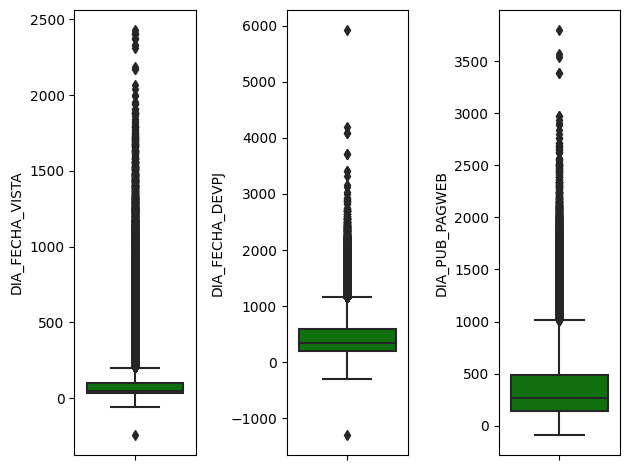

In [247]:
num=new_df2.select_dtypes(include='number').columns
for i in range(0,len(num)):
    plt.subplot(1,len(num),i+1)
    sns.boxplot(y=new_df2[num[i]],color='green',orient='v')
    #plt.title(i,fontsize=12,weight='bold')
    plt.tight_layout()
plt.show()

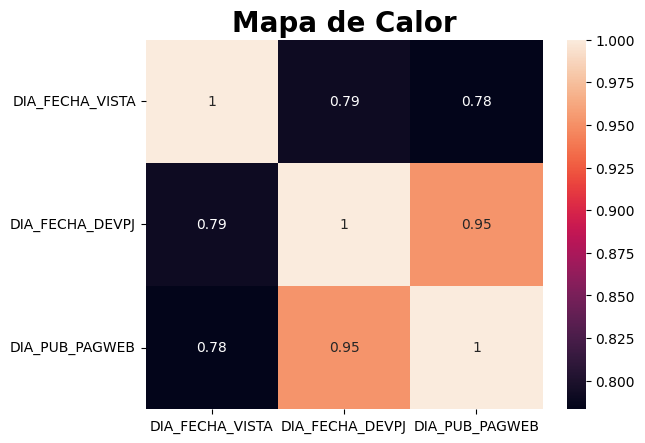

In [248]:
sns.heatmap(new_df2[num].corr(),annot=True)
plt.title('Mapa de Calor',fontsize=20,weight='bold')
plt.show()

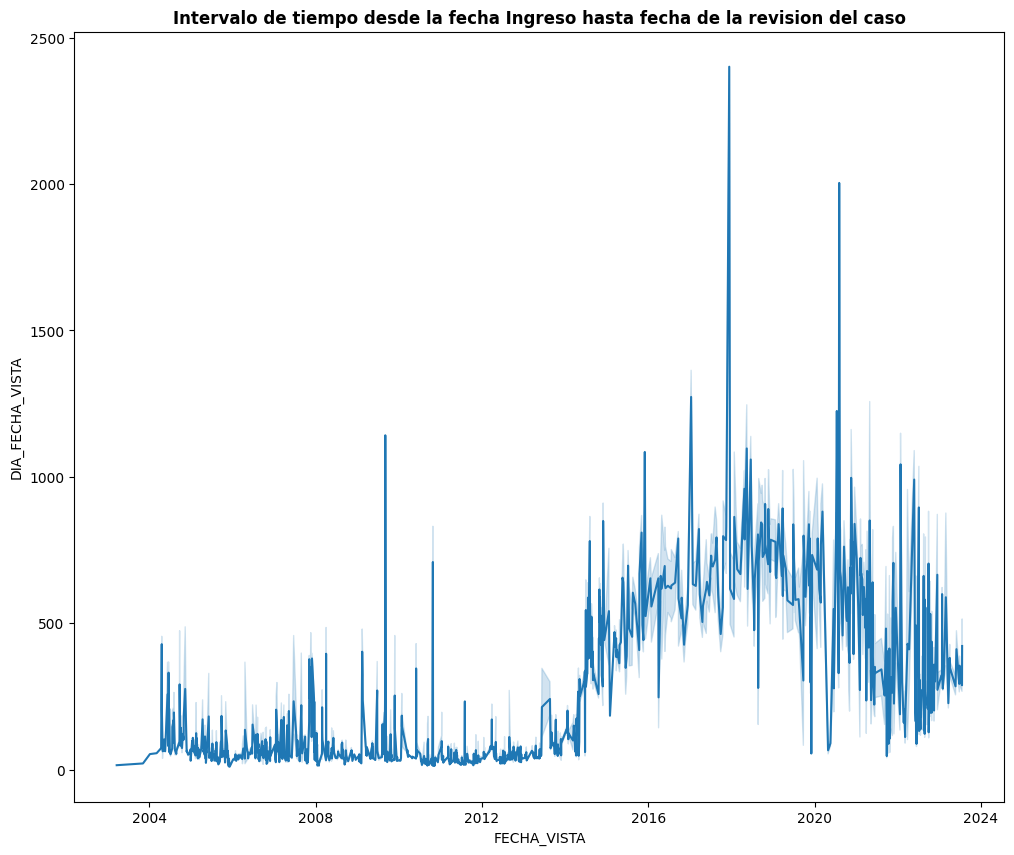

In [249]:
plt.figure(figsize=(12,10))
sns.lineplot(data=new_df2,x='FECHA_VISTA',y='DIA_FECHA_VISTA')
plt.title('Intervalo de tiempo desde la fecha Ingreso hasta fecha de la revision del caso',fontsize=12,weight='bold')
plt.show()

"Se creó un gráfico de línea que abarca un intervalo desde la fecha de ingreso hasta la fecha programada en la que se revisa públicamente el caso, reflejando el número de días transcurridos hasta la fecha de vista.

Este gráfico no muestra claramente que las fechas de revisión pública del caso aumentaron a partir del año 2016 en adelante hasta las ultima programadas en el 2024."

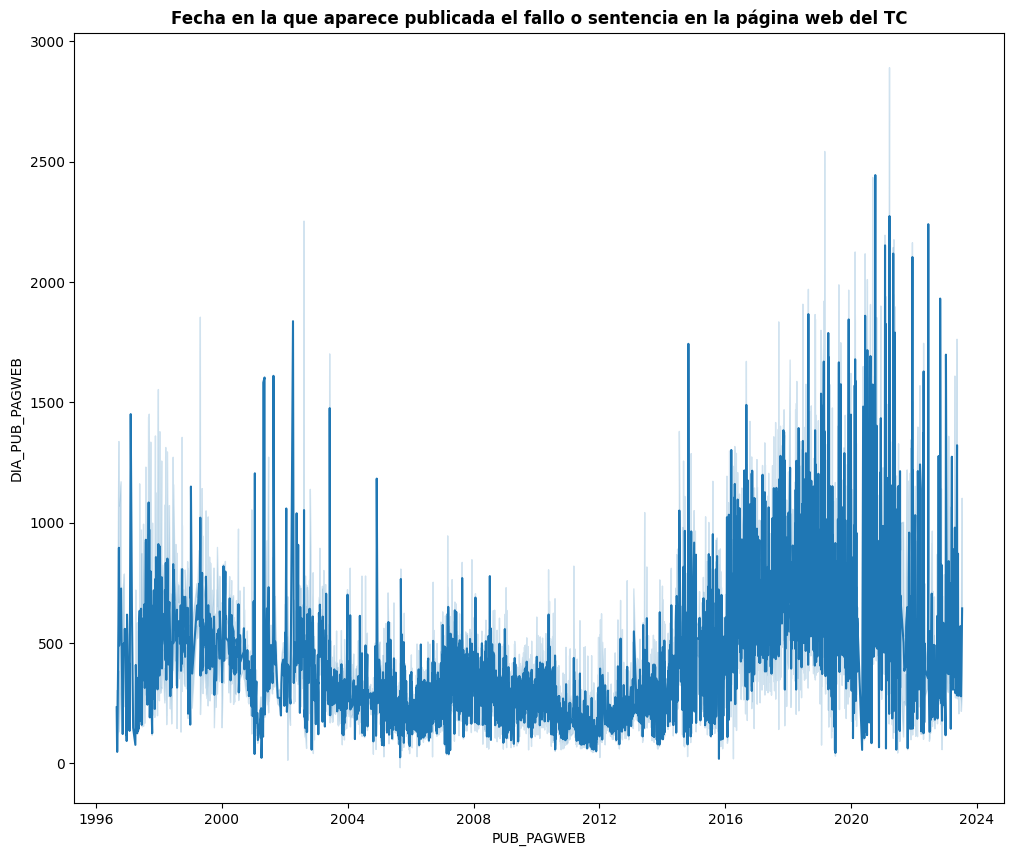

In [251]:
plt.figure(figsize=(12,10))
sns.lineplot(data=new_df2,x='PUB_PAGWEB',y='DIA_PUB_PAGWEB')
plt.title('Fecha en la que aparece publicada el fallo o sentencia en la página web del TC',fontsize=12,weight='bold')
plt.show()

* Este grafico de linea nos indica el tiempo en dias que se demora publicar un fallo o sentencia en la pagina web.


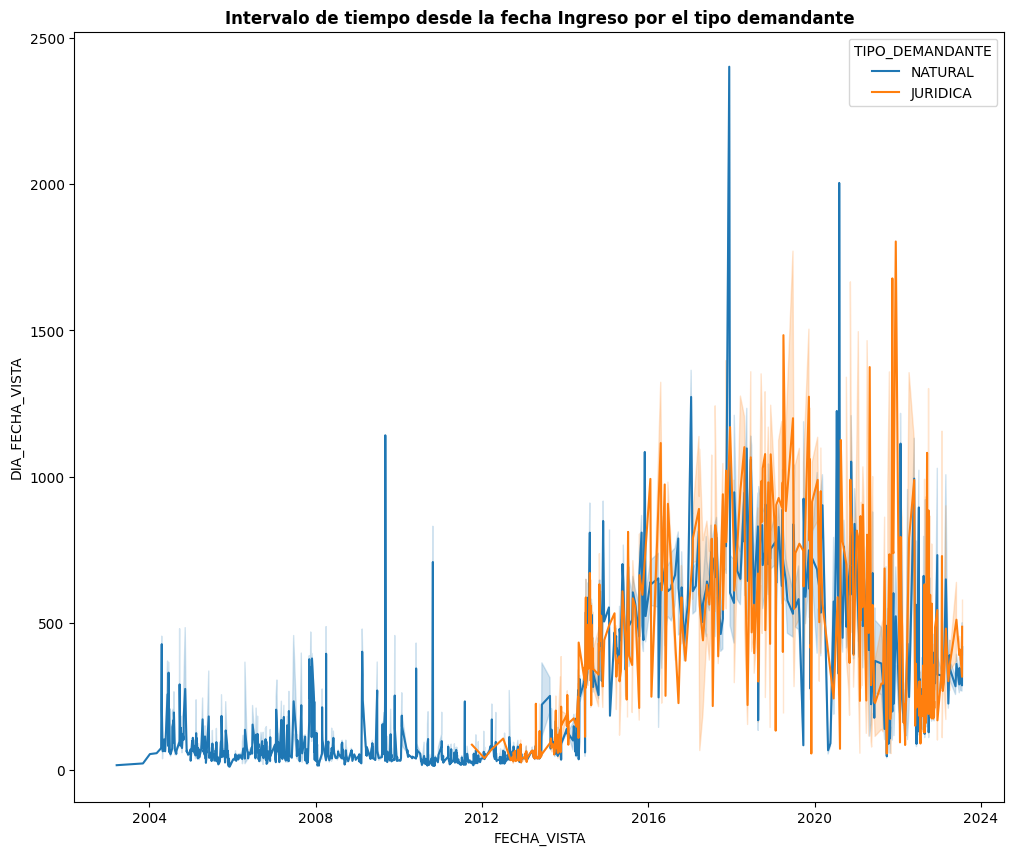

In [252]:
plt.figure(figsize=(12,10))
sns.lineplot(data=new_df2,x='FECHA_VISTA',y='DIA_FECHA_VISTA',hue='TIPO_DEMANDANTE')
plt.title('Intervalo de tiempo desde la fecha Ingreso por el tipo demandante',fontsize=12,weight='bold')
plt.show()

* Este gráfico de líneas representa la fecha programada en la que se revisa públicamente el caso en días, desglosado por el tipo de demandante. Como se evidencia en el gráfico, a partir de 2012 en adelante, se observa un aumento tanto en los demandantes jurídicos como en los naturales, una tendencia que continúa hasta el año 2023.

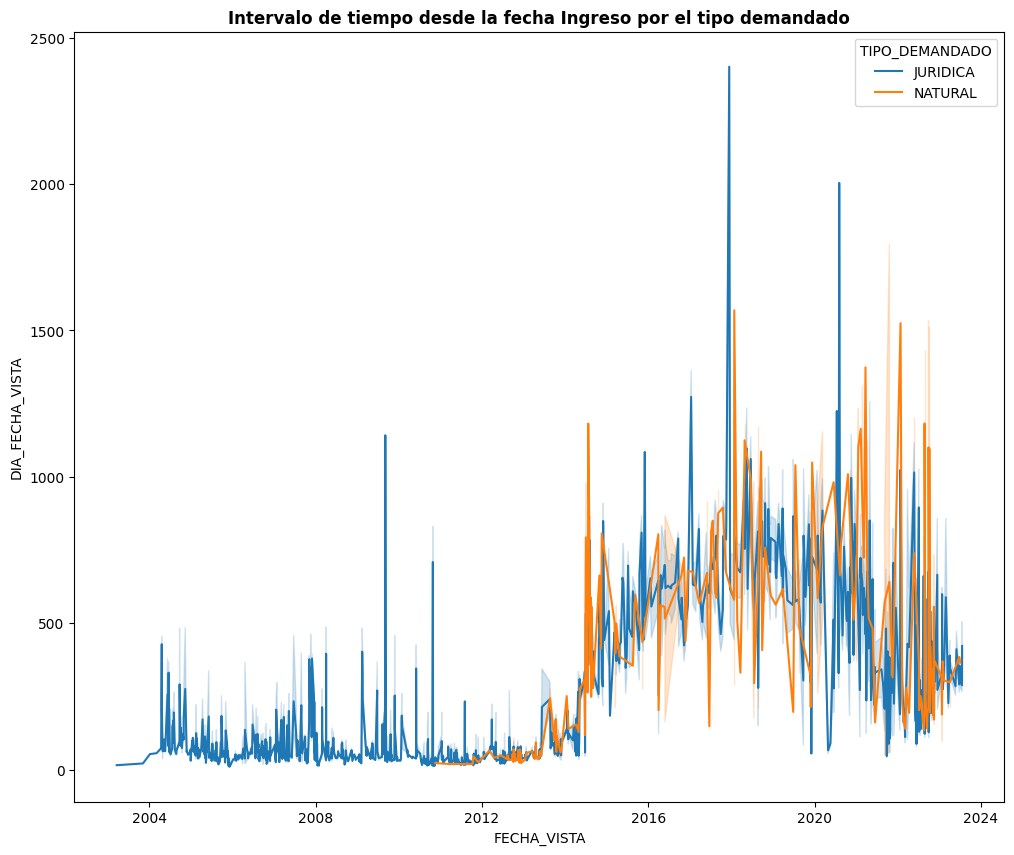

In [58]:
plt.figure(figsize=(12,10))
sns.lineplot(data=new_df2,x='FECHA_VISTA',y='DIA_FECHA_VISTA',hue='TIPO_DEMANDADO')
plt.title('Intervalo de tiempo desde la fecha Ingreso por el tipo demandado',fontsize=12,weight='bold')
plt.show()

* Este gráfico de líneas representa la fecha programada en la que se revisa públicamente el caso en días, desglosado por el tipo de demandando. Como se evidencia en el gráfico, a partir de 2012 en adelante, se observa un aumento tanto en los demandantes jurídicos como en los naturales, una tendencia que continúa hasta el año 2023.

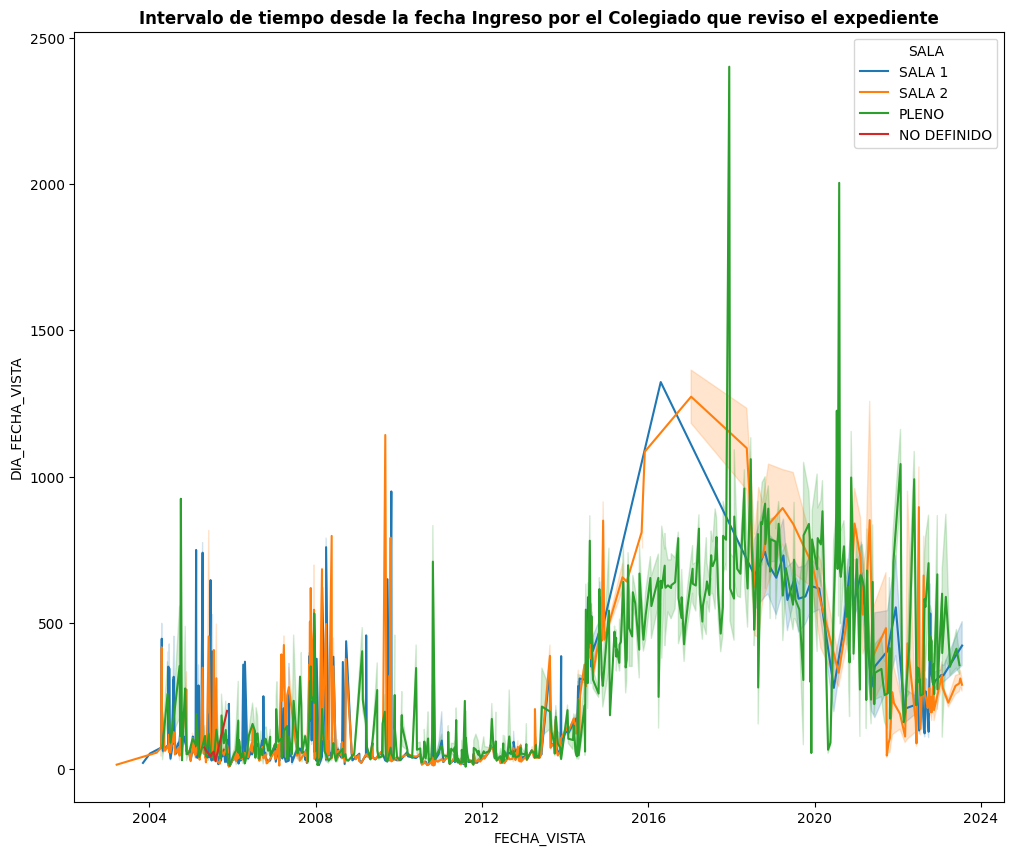

In [253]:
plt.figure(figsize=(12,10))
sns.lineplot(data=new_df2,x='FECHA_VISTA',y='DIA_FECHA_VISTA',hue='SALA')
plt.title('Intervalo de tiempo desde la fecha Ingreso por el Colegiado que reviso el expediente',fontsize=12,weight='bold')
plt.show()

* Este grafico de linea nos muestra Intervalo de tiempo desde la fecha Ingreso en dias  por el Colegiado que reviso el expediente.

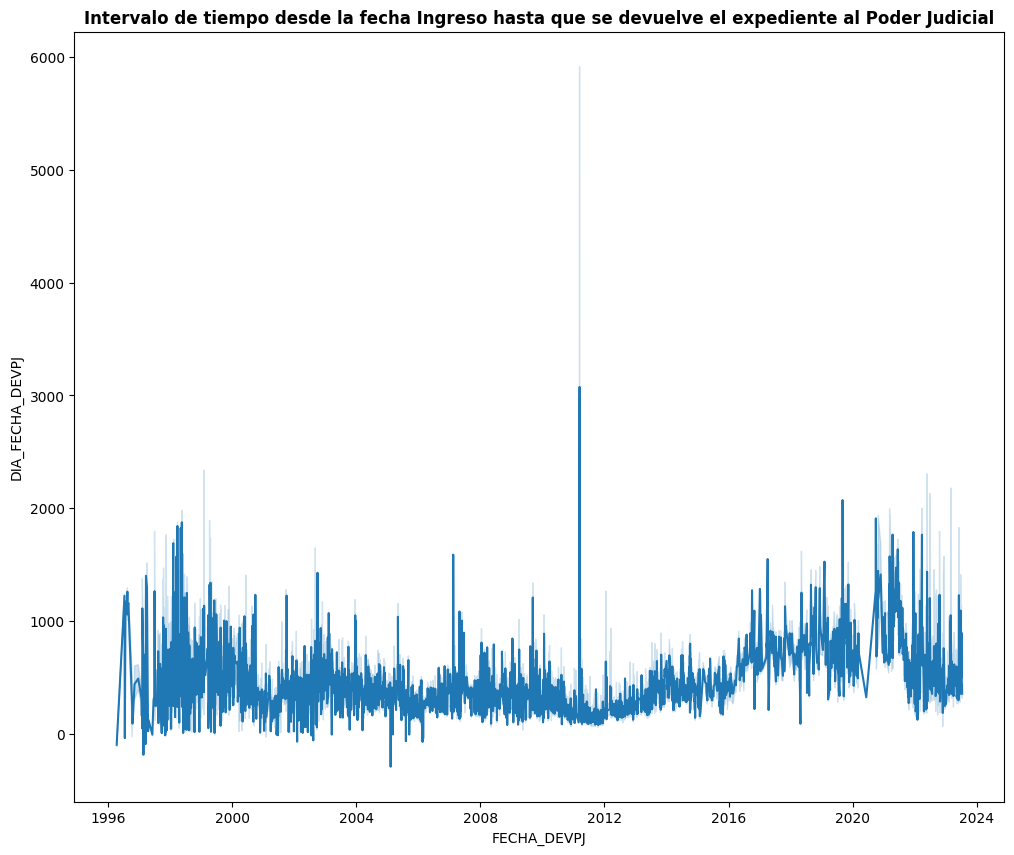

In [60]:
plt.figure(figsize=(12,10))
sns.lineplot(data=new_df2,x='FECHA_DEVPJ',y='DIA_FECHA_DEVPJ')
plt.title('Intervalo de tiempo desde la fecha Ingreso hasta que se devuelve el expediente al Poder Judicial',fontsize=12,weight='bold')
plt.show()

* Este gráfico representa el intervalo de tiempo, en días, en el cual el expediente es devuelto al Poder Judicial.

* Como se aprecia en el gráfico, la serie se mantiene constante, sin presentar fluctuaciones significativas durante el período analizado.

### **Graficos de Correlacion entre los datos numericos**

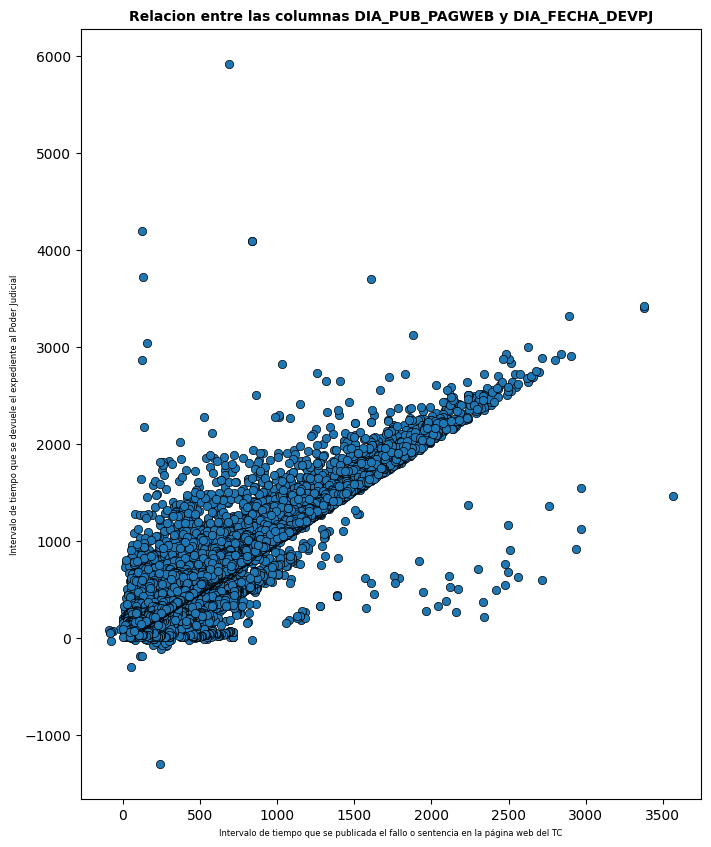

In [254]:
# Tal como se evidencia en el mapa de calor existe una correlación 
# fuerte entre las columnas DIA_PUB_PAGWEB y DIA_FECHA_DEVPJ

plt.figure(figsize=(8,10))
plt.scatter(x=new_df2['DIA_PUB_PAGWEB'], y=new_df2['DIA_FECHA_DEVPJ'], linewidths=0.5,edgecolors="#000000")
plt.title('Relacion entre las columnas DIA_PUB_PAGWEB y DIA_FECHA_DEVPJ',fontsize=10,weight='bold')
plt.xlabel('Intervalo de tiempo que se publicada el fallo o sentencia en la página web del TC',fontsize=6)
plt.ylabel('Intervalo de tiempo que se devuele el expediente al Poder Judicial',fontsize=6)
plt.show()



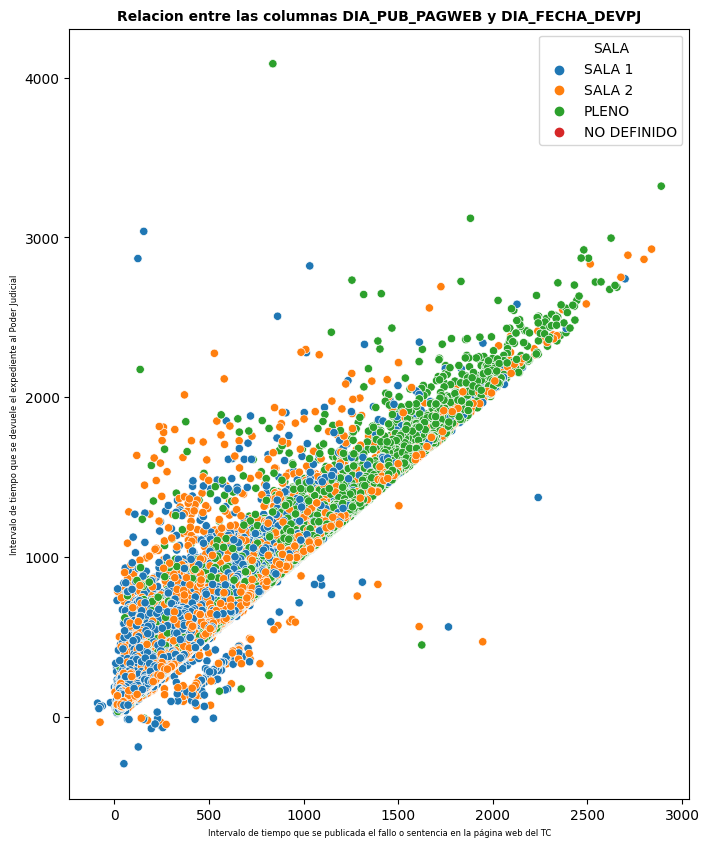

In [255]:
plt.figure(figsize=(8,10))
sns.scatterplot(data=new_df2,x='DIA_PUB_PAGWEB', y='DIA_FECHA_DEVPJ',hue='SALA', linewidths=0.5,edgecolors="#000000")
plt.title('Relacion entre las columnas DIA_PUB_PAGWEB y DIA_FECHA_DEVPJ',fontsize=10,weight='bold')
plt.xlabel('Intervalo de tiempo que se publicada el fallo o sentencia en la página web del TC',fontsize=6)
plt.ylabel('Intervalo de tiempo que se devuele el expediente al Poder Judicial',fontsize=6)
plt.show()

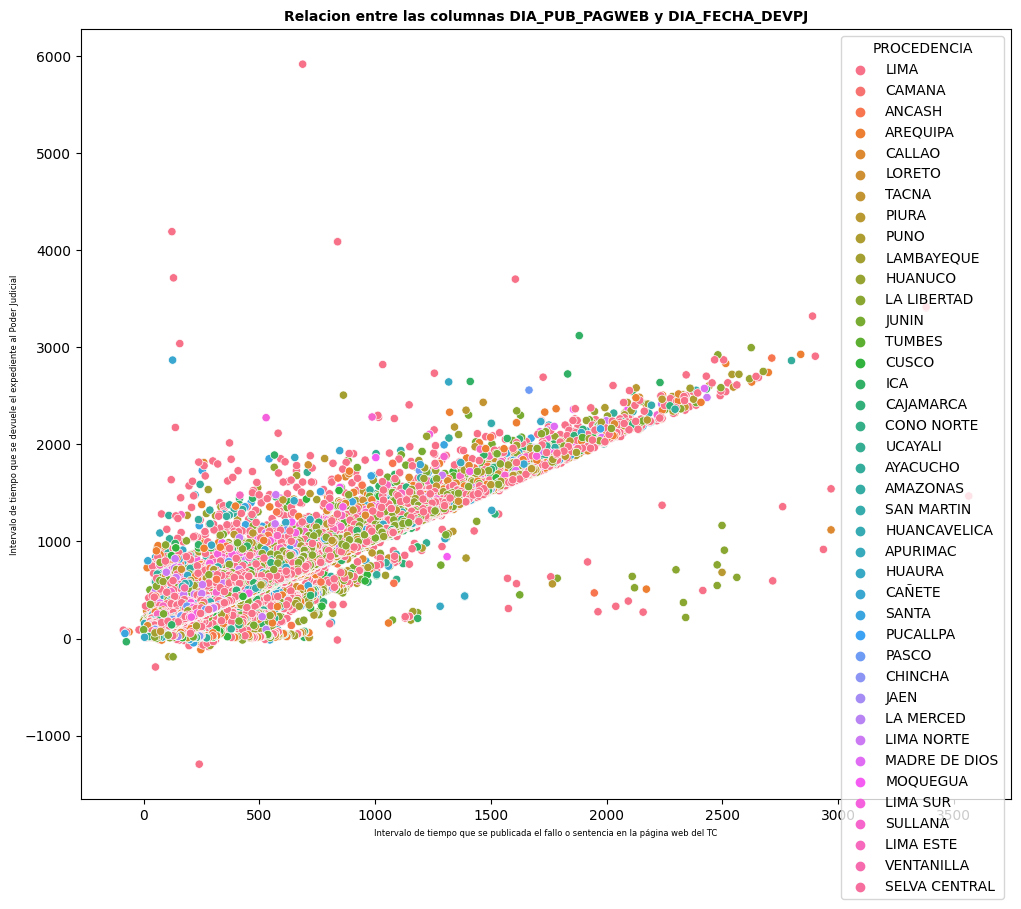

In [256]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=new_df2,x='DIA_PUB_PAGWEB', y='DIA_FECHA_DEVPJ',hue='PROCEDENCIA', linewidths=0.5,edgecolors="#000000")
plt.title('Relacion entre las columnas DIA_PUB_PAGWEB y DIA_FECHA_DEVPJ',fontsize=10,weight='bold')
plt.xlabel('Intervalo de tiempo que se publicada el fallo o sentencia en la página web del TC',fontsize=6)
plt.ylabel('Intervalo de tiempo que se devuele el expediente al Poder Judicial',fontsize=6)
plt.show()

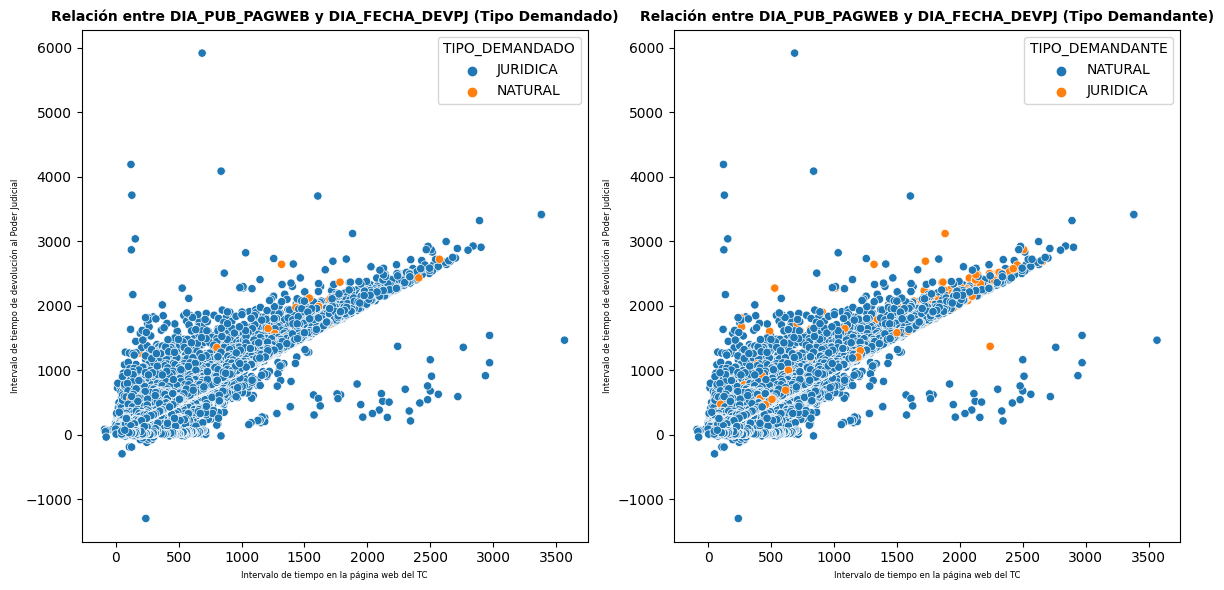

In [257]:
# Crear una figura con dos subgráficos dispuestos en una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Primer subgráfico
sns.scatterplot(data=new_df2, x='DIA_PUB_PAGWEB', y='DIA_FECHA_DEVPJ', hue='TIPO_DEMANDADO', linewidths=0.5, edgecolors="#000000", ax=axes[0])
axes[0].set_title('Relación entre DIA_PUB_PAGWEB y DIA_FECHA_DEVPJ (Tipo Demandado)', fontsize=10, weight='bold')
axes[0].set_xlabel('Intervalo de tiempo en la página web del TC', fontsize=6)
axes[0].set_ylabel('Intervalo de tiempo de devolución al Poder Judicial', fontsize=6)

# Segundo subgráfico
sns.scatterplot(data=new_df2, x='DIA_PUB_PAGWEB', y='DIA_FECHA_DEVPJ', hue='TIPO_DEMANDANTE', linewidths=0.5, edgecolors="#000000", ax=axes[1])
axes[1].set_title('Relación entre DIA_PUB_PAGWEB y DIA_FECHA_DEVPJ (Tipo Demandante)', fontsize=10, weight='bold')
axes[1].set_xlabel('Intervalo de tiempo en la página web del TC', fontsize=6)
axes[1].set_ylabel('Intervalo de tiempo de devolución al Poder Judicial', fontsize=6)

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura con los dos subgráficos
plt.show()

In [259]:
null_values=pd.DataFrame(new_df2.isnull().sum(),columns=['Null Values'])
null_values['% Missing Values']=(new_df2.isna().sum()/len(new_df2)*100)
null_values=null_values[null_values['% Missing Values']>0]
null_values.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

# ***Analisis de Expediente Ingresados del año 1992 hasta el año 2023***

## **Analisis del Año 2023**

In [260]:
df_2023=new_df2[new_df2['FECHA_INGRESO']>='2023-01-01']
df_2023.isnull().sum()

FECHA_INGRESO          0
PROCEDENCIA            0
CDES_TIPOPROCESO       0
SALA_ORIGEN           51
TIPO_DEMANDANTE        0
TIPO_DEMANDADO         0
SALA                   0
FECHA_VISTA         2601
MATERIA                3
PUB_PAGWEB          2565
FALLO               2569
FECHA_DEVPJ         2591
DIA_FECHA_VISTA     2601
DIA_FECHA_DEVPJ     2591
DIA_PUB_PAGWEB      2565
dtype: int64

In [261]:
# Crea un nuevo DataFrame llamado "df_2023_no_nulls" que contiene las filas de "df_2023" donde las columnas 'FECHA_VISTA', 'PUB_PAGWEB' y 'FECHA_DEVPJ' no tienen valores nulos.
df_2023_no_nulls = df_2023.dropna(subset=['FECHA_VISTA', 'PUB_PAGWEB', 'FECHA_DEVPJ'])

# Muestra el contenido del DataFrame "df_2023_no_nulls", que ahora contiene solo las filas sin valores nulos en las columnas especificadas.
df_2023_no_nulls

FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO  \
94859    2023-01-09       SANTA  ACCION DE AMPARO   
94876    2023-01-09       SANTA  ACCION DE AMPARO   
94912    2023-01-11       SANTA  ACCION DE AMPARO   
95098    2023-01-31       SANTA  ACCION DE AMPARO   

                                             SALA_ORIGEN TIPO_DEMANDANTE  \
94859  PRESIDENTE DE LA PRIMERA SALA CIVIL DE LA CORT...         NATURAL   
94876  PRESIDENTE DE LA SEGUNDA SALA CIVIL DE LA CORT...         NATURAL   
94912  PRESIDENTE DE LA SEGUNDA SALA CIVIL DE LA CORT...         NATURAL   
95098  PRESIDENTE DE LA SEGUNDA SALA CIVIL DE LA CORT...         NATURAL   

      TIPO_DEMANDADO    SALA FECHA_VISTA      MATERIA PUB_PAGWEB      FALLO  \
94859       JURIDICA  SALA 2  2023-06-26  Previsional 2023-06-28  Infundada   
94876       JURIDICA  SALA 2  2023-06-26  Previsional 2023-06-28  Infundada   
94912       JURIDICA  SALA 2  2023-06-26  Previsional 2023-06-28  Infundada   
95098       JURIDICA  SALA 2  2023-06-26  Previsional 2023-06-28  Infundada   

      FECHA_DEVPJ  DIA_FECHA_VISTA  DIA_FECHA_DEVPJ  DIA_PUB_PAGWEB  
94859  2023-07-14            168.0            186.0           170.0  
94876  2023-07-14            168.0            186.0           170.0  
94912  2023-07-14            166.0            184.0           168.0  
95098  2023-07-14            146.0            164.0           148.0

In [270]:
# Existe un total de casos no analizados durante el año 2023
print('Existe un total de casos no analizados durante el año 2023 lo cual equivale a'
      ,df_2023.shape[0]-df_2023_no_nulls.shape[0])

Existe un total de casos no analizados durante el año 2023 lo cual equivale a 2629


<Axes: xlabel='DIA_FECHA_VISTA', ylabel='Count'>

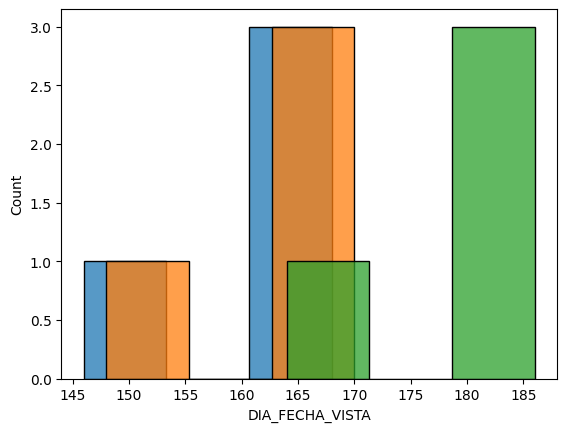

In [263]:
sns.histplot(x=df_2023_no_nulls['DIA_FECHA_VISTA'])
sns.histplot(x=df_2023_no_nulls['DIA_PUB_PAGWEB'])
sns.histplot(x=df_2023_no_nulls['DIA_FECHA_DEVPJ'])

In [264]:
df_2023_no_nulls[df_2023_no_nulls.select_dtypes(include='number').columns].describe()

DIA_FECHA_VISTA  DIA_FECHA_DEVPJ  DIA_PUB_PAGWEB
count         4.000000         4.000000        4.000000
mean        162.000000       180.000000      164.000000
std          10.708252        10.708252       10.708252
min         146.000000       164.000000      148.000000
25%         161.000000       179.000000      163.000000
50%         167.000000       185.000000      169.000000
75%         168.000000       186.000000      170.000000
max         168.000000       186.000000      170.000000

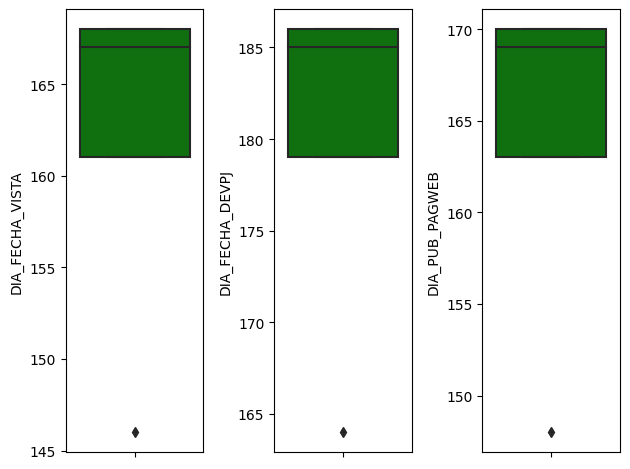

In [265]:
num=df_2023_no_nulls.select_dtypes(include='number').columns
for i in range(0,len(num)):
    plt.subplot(1,len(num),i+1)
    sns.boxplot(y=df_2023_no_nulls[num[i]],color='green',orient='v')
    #plt.title(i,fontsize=12,weight='bold')
    plt.tight_layout()
plt.show()

In [266]:
describeNum = df_2023_no_nulls.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

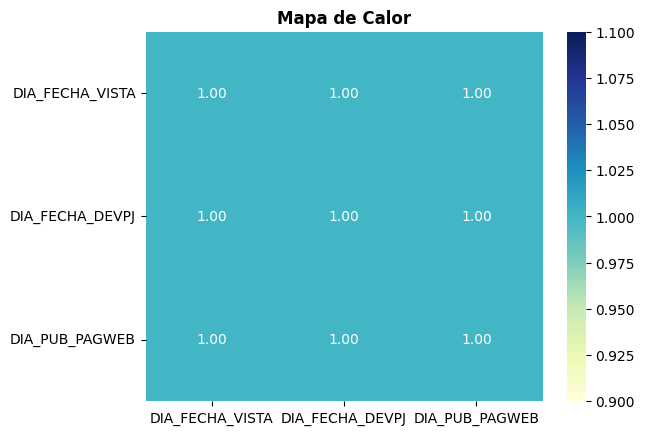

In [267]:
sns.heatmap(df_2023_no_nulls[num].corr(),annot=True,cmap='YlGnBu', fmt='.2f')
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()

* Tal como se evidencia en el mapa de calor existe un correlacion del 100 porcienteo entre las 3 columnas analizadas


## **Analisis del Año 2022**

In [271]:
df_2022 = new_df2[(new_df2['FECHA_INGRESO'] >= '2022-01-01') & (new_df2['FECHA_INGRESO'] <= '2022-12-31')]
df_2022.isnull().sum()

FECHA_INGRESO          0
PROCEDENCIA            0
CDES_TIPOPROCESO       0
SALA_ORIGEN          109
TIPO_DEMANDANTE        0
TIPO_DEMANDADO         0
SALA                   0
FECHA_VISTA         3956
MATERIA               17
PUB_PAGWEB          2868
FALLO               2908
FECHA_DEVPJ         3228
DIA_FECHA_VISTA     3956
DIA_FECHA_DEVPJ     3228
DIA_PUB_PAGWEB      2868
dtype: int64

In [272]:
df_2022_no_nulls=df_2022.dropna(subset=['FECHA_VISTA','PUB_PAGWEB','FECHA_DEVPJ'])
df_2022_no_nulls

FECHA_INGRESO PROCEDENCIA  CDES_TIPOPROCESO  \
91715     2022-01-04        LIMA  ACCION DE AMPARO   
91720     2022-01-04        LIMA  ACCION DE AMPARO   
91726     2022-01-04       SANTA  ACCION DE AMPARO   
91732     2022-01-04        LIMA  ACCION DE AMPARO   
91733     2022-01-04       CUSCO  ACCION DE AMPARO   
...              ...         ...               ...   
133359    2022-05-31        LIMA       HABEAS DATA   
133360    2022-05-31        LIMA       HABEAS DATA   
133361    2022-05-31        LIMA       HABEAS DATA   
133362    2022-05-31        LIMA       HABEAS DATA   
133426    2022-08-09        LIMA       HABEAS DATA   

                                              SALA_ORIGEN TIPO_DEMANDANTE  \
91715   PRESIDENTE DE LA TERCERA SALA CONSTITUCIONAL D...        JURIDICA   
91720   PRESIDENTE DE LA TERCERA SALA CONSTITUCIONAL D...        JURIDICA   
91726   PRESIDENTE DE LA SEGUNDA SALA CIVIL DE LA CORT...         NATURAL   
91732   PRESIDENTE DE LA PRIMERA SALA CONSTITUCIONAL D...        JURIDICA   
91733   PRESIDENTE DE LA SALA CIVIL DE LA CORTE SUPERI...         NATURAL   
...                                                   ...             ...   
133359  PRESIDENTE DE LA SEGUNDA SALA CONSTITUCIONAL D...         NATURAL   
133360  PRESIDENTE DE LA PRIMERA SALA CONSTITUCIONAL D...         NATURAL   
133361  PRESIDENTE DE LA PRIMERA SALA CONSTITUCIONAL D...         NATURAL   
133362  PRESIDENTE DE LA PRIMERA SALA CONSTITUCIONAL D...         NATURAL   
133426  PRESIDENTE DE LA PRIMERA SALA CONSTITUCIONAL D...         NATURAL   

       TIPO_DEMANDADO    SALA FECHA_VISTA  \
91715        JURIDICA   PLENO  2022-10-06   
91720        JURIDICA  SALA 2  2022-09-07   
91726        JURIDICA  SALA 2  2022-08-24   
91732        JURIDICA   PLENO  2022-10-06   
91733        JURIDICA   PLENO  2022-06-23   
...               ...     ...         ...   
133359       JURIDICA  SALA 1  2022-08-26   
133360       JURIDICA  SALA 1  2022-09-30   
133361       JURIDICA  SALA 2  2022-11-16   
133362       JURIDICA  SALA 1  2022-09-30   
133426       JURIDICA  SALA 2  2022-11-16   

                                               MATERIA PUB_PAGWEB  \
91715                          Resoluciones judiciales 2023-03-17   
91720                          Resoluciones judiciales 2022-10-28   
91726                               Asuntos especiales 2022-10-28   
91732                          Resoluciones judiciales 2022-12-21   
91733                          Resoluciones judiciales 2022-10-12   
...                                                ...        ...   
133359                         Acceso a la informaci¢n 2022-11-10   
133360  Protecci¢n de la autodeterminaci¢n informativa 2022-11-10   
133361  Protecci¢n de la autodeterminaci¢n informativa 2023-02-28   
133362                         Acceso a la informaci¢n 2022-11-10   
133426                         Acceso a la informaci¢n 2022-12-23   

                      FALLO FECHA_DEVPJ  DIA_FECHA_VISTA  DIA_FECHA_DEVPJ  \
91715       Admitir Demanda  2023-04-05            275.0            456.0   
91720          Improcedente  2022-11-29            246.0            329.0   
91726          Improcedente  2023-01-23            232.0            384.0   
91732       Admitir Demanda  2023-02-06            275.0            398.0   
91733               Fundada  2022-11-10            170.0            310.0   
...                     ...         ...              ...              ...   
133359  Improcedente el RAC  2023-01-23             87.0            237.0   
133360  Improcedente el RAC  2023-01-11            122.0            225.0   
133361  Improcedente el RAC  2023-03-17            169.0            290.0   
133362  Improcedente el RAC  2023-01-11            122.0            225.0   
133426  Improcedente el RAC  2023-01-31             99.0            175.0   

        DIA_PUB_PAGWEB  
91715            437.0  
91720            297.0  
91726            297.0  
91732            351.0  
91733        

In [274]:
# Existe un total de casos no analizados durante el año 2022
print('Existe un total de casos no analizados durante el año 2022 que equivale a ' 
      ,df_2022.shape[0]-df_2022_no_nulls.shape[0])

Existe un total de casos no analizados durante el año 2022 que equivale a  4490


<Axes: xlabel='DIA_FECHA_VISTA', ylabel='Count'>

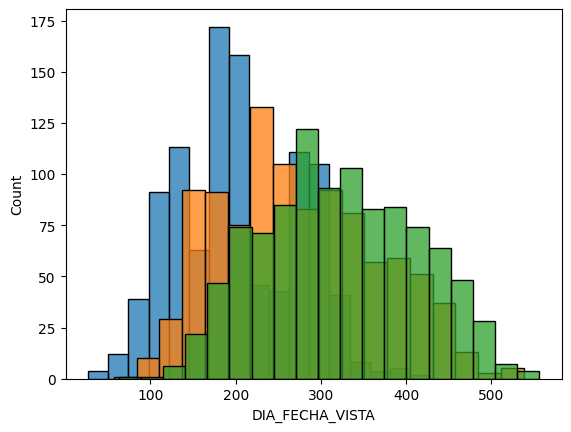

In [275]:
sns.histplot(x=df_2022_no_nulls['DIA_FECHA_VISTA'])
sns.histplot(x=df_2022_no_nulls['DIA_PUB_PAGWEB'])
sns.histplot(x=df_2022_no_nulls['DIA_FECHA_DEVPJ'])

In [276]:
describeNum = df_2022_no_nulls.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

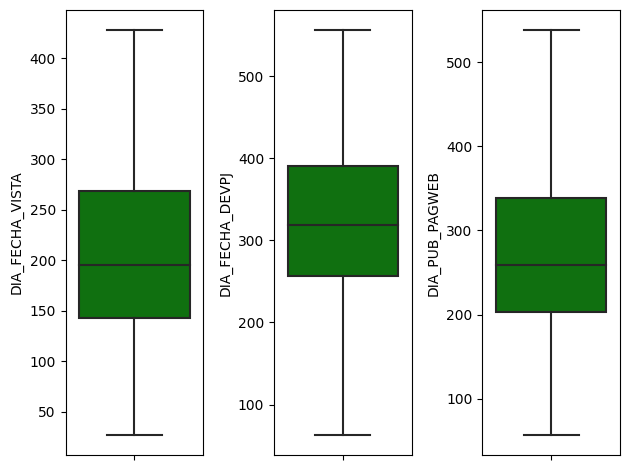

In [277]:
num=df_2022_no_nulls.select_dtypes(include='number').columns
for i in range(0,len(num)):
    plt.subplot(1,len(num),i+1)
    sns.boxplot(y=df_2022_no_nulls[num[i]],color='green',orient='v')
    #plt.title(i,fontsize=12,weight='bold')
    plt.tight_layout()
plt.show()

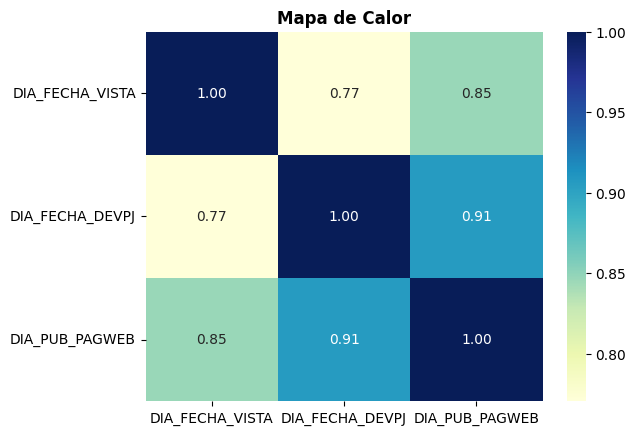

In [278]:
sns.heatmap(df_2022_no_nulls[num].corr(),annot=True,cmap='YlGnBu', fmt='.2f')
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()

* En comparacaion al año anterior las 3 columnas numericas ya no presenta una correlacion de un 100 porciento sin embargo su correlacion es significativa entre ellas.

## **Expediente Ingresados del año 1992 hasta el año 2023**

* Para que un expediente sea considerado como ingresado al Tribunal Constitucional al 100%, se requiere que las columnas 'FECHA_VISTA', 'PUB_PAGWEB' y 'FECHA_DEVPJ' no contengan valores vacíos.

In [279]:
# Definición de una función que filtra un DataFrame por un año específico.
def filter_dataframe_by_year(dataframe, year):
    start_date = f'{year}-01-01'  # Fecha de inicio del año especificado
    end_date = f'{year}-12-31'    # Fecha de fin del año especificado
    filtered_df = dataframe[(dataframe['FECHA_INGRESO'] >= start_date) & (dataframe['FECHA_INGRESO'] <= end_date)]
    return filtered_df

# Lista de años desde 1992 hasta 2023.
years = range(1992, 2024)  # Desde 1992 hasta 2023

# Diccionario que almacenará los DataFrames filtrados por año.
filtered_dfs = {}

# Itera a través de los años y filtra el DataFrame "new_df2" por año, almacenando los resultados en el diccionario "filtered_dfs".
for year in years:
    filtered_dfs[year] = filter_dataframe_by_year(new_df2, year)

# Lista que almacenará los datos agregados por año.
data_1992_2023 = []

# Itera a través de los DataFrames filtrados por año y realiza cálculos de datos relevantes.
for year, df in filtered_dfs.items():
    df_no_nulls = df.dropna(subset=['FECHA_VISTA', 'PUB_PAGWEB', 'FECHA_DEVPJ'])
    data_1992_2023.append({
        'Año': year,
        'Expedientes ingresados': df.shape[0],
        'Expedientes Ingresados 100%': df_no_nulls.shape[0]
    })

# Crea un nuevo DataFrame a partir de los datos recopilados.
data_1992_2023 = pd.DataFrame(data_1992_2023)

# Muestra las primeras filas del DataFrame "data_1992_2023".
data_1992_2023.head()


Año  Expedientes ingresados  Expedientes Ingresados 100%
0  1992                     134                            0
1  1993                     392                            0
2  1994                       6                            0
3  1995                     266                            0
4  1996                    1227                            0

In [280]:
data_1992_2023['Expendientes Inconpletos']=data_1992_2023['Expedientes ingresados']-data_1992_2023['Expedientes Ingresados 100%']
data_1992_2023['Año']=pd.to_datetime(data_1992_2023['Año'],format='%Y')
data_1992_2023.set_index('Año',inplace=True)
data_1992_2023

Expedientes ingresados  Expedientes Ingresados 100%  \
Año                                                               
1992-01-01                     134                            0   
1993-01-01                     392                            0   
1994-01-01                       6                            0   
1995-01-01                     266                            0   
1996-01-01                    1227                            0   
1997-01-01                    1557                            0   
1998-01-01                    1241                            0   
1999-01-01                    1371                            0   
2000-01-01                    1439                            1   
2001-01-01                    1586                            2   
2002-01-01                    3107                           27   
2003-01-01                    3828                          295   
2004-01-01                    5112                         3860   
2005-01-01                   10825                        10200   
2006-01-01                   11266                        10873   
2007-01-01                    6833                         6522   
2008-01-01                    7273                         6881   
2009-01-01                    6619                         6221   
2010-01-01                    4668                         4346   
2011-01-01                    5929                         5410   
2012-01-01                    5330                         4872   
2013-01-01                    9029                         8080   
2014-01-01                    6511                         1724   
2015-01-01                    7369                          867   
2016-01-01                    5907                          931   
2017-01-01                    5230                          845   
2018-01-01                    5041                          786   
2019-01-01                    5127                          728   
2020-01-01                    2418                          450   
2021-01-01                    4147                         1074   
2022-01-01                    5507                         1017   
2023-01-01                    2633                            4   

            Expendientes Inconpletos  
Año                                   
1992-01-01                       134  
1993-01-01                       392  
1994-01-01                         6  
1995-01-01                       266  
1996-01-01                      1227  
1997-01-01                      1557  
1998-01-01                      1241  
1999-01-01                      1371  
2000-01-01                      1438  
2001-01-01                      1584  
2002-01-01                      3080  
2003-01-01                      3533  
2004-01-01                      1252  
2005-01-01                       625  
2006-01-01                       393  
2007-01-01                       311  
2008-01-01                       392  
2009-01-01                       398  
2010-01-01                       322  
2011-01-01                       519  
2012-01-01                       458  
2013-01-01                       949  
2014-01-01                      4787  
2015-01-01                      6502  
2016-01-01                      4976  
2017-01-01                      4385  
2018-01-01                      4255  
2019-01-01                      4399  
2020-01-01                      1968  
2021-01-01                      3073  
2022-01-01                      4490  
2023-01-01                      2629

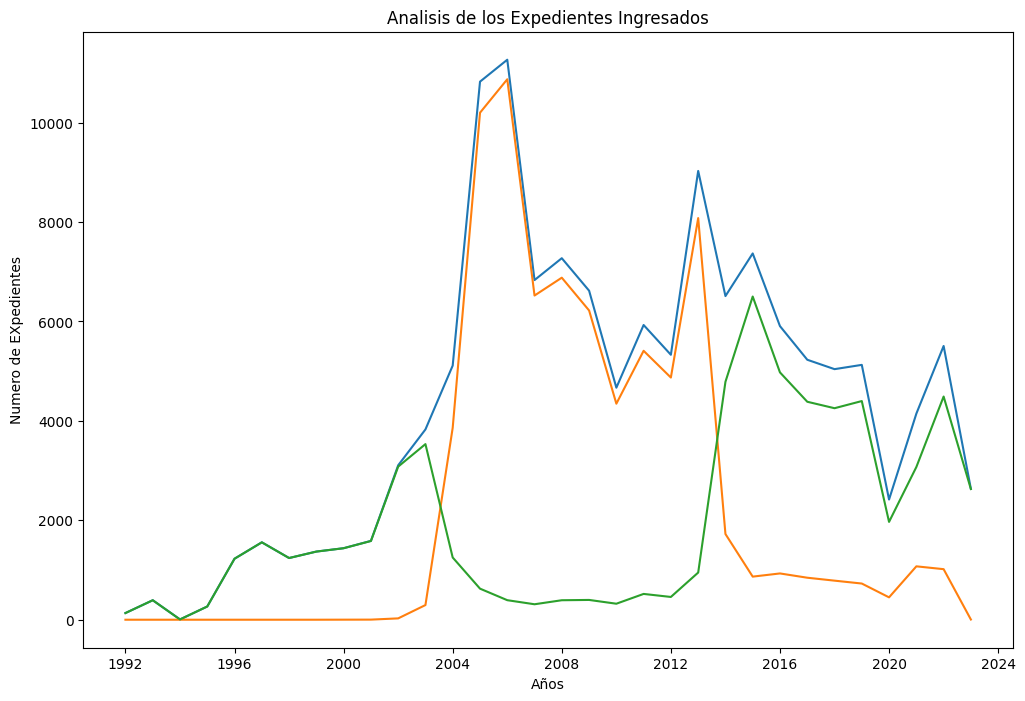

In [281]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_1992_2023,x=data_1992_2023.index,y='Expedientes ingresados')
sns.lineplot(data=data_1992_2023,x=data_1992_2023.index,y='Expedientes Ingresados 100%')
sns.lineplot(data=data_1992_2023,x=data_1992_2023.index,y='Expendientes Inconpletos')
plt.title('Analisis de los Expedientes Ingresados')
plt.ylabel('Numero de EXpedientes')
plt.xlabel('Años')
plt.show()

<Axes: >

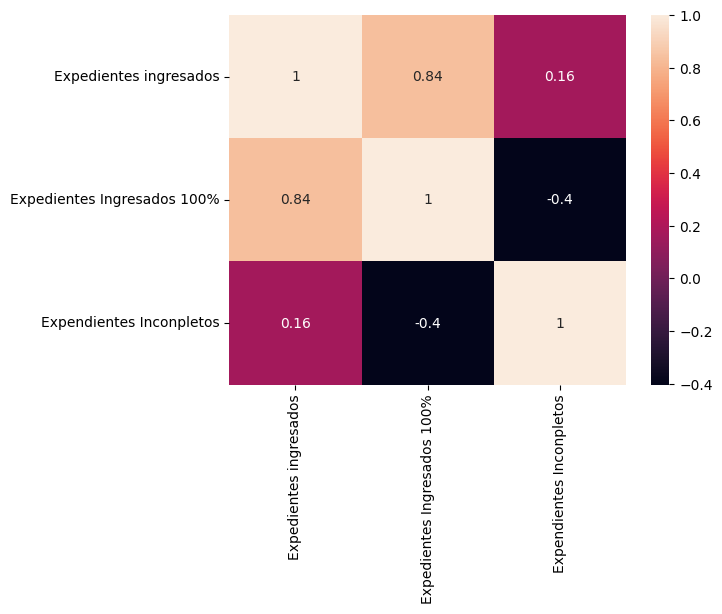

In [282]:
sns.heatmap(data_1992_2023.corr(),annot=True)

* Tal como se evidencia en la grafica los expedientes ingresados presenta un relacion significativa del 0.84 % con los expediente ingresados al 100%

## **Otro Analisis Ingresados del año 1992 hasta el año 2023**

* Para que un expediente sea considerado como ingresado al Tribunal Constitucional al 100%, se requiere que las columnas 'PUB_PAGWEB', 'FECHA_DEVPJ' no contengan valores vacíos.


In [346]:
# Definición de una función que filtra un DataFrame por un año específico.
def filter_dataframe_by_year(dataframe, year):
    start_date = f'{year}-01-01'  # Fecha de inicio del año especificado
    end_date = f'{year}-12-31'    # Fecha de fin del año especificado
    filtered_df = dataframe[(dataframe['FECHA_INGRESO'] >= start_date) & (dataframe['FECHA_INGRESO'] <= end_date)]
    return filtered_df

# Lista de años desde 1992 hasta 2023.
years = range(1992, 2024)  # Desde 1992 hasta 2023

# Diccionario que almacenará los DataFrames filtrados por año.
filtered_dfs = {}

# Itera a través de los años y filtra el DataFrame "new_df2" por año, almacenando los resultados en el diccionario "filtered_dfs".
for year in years:
    filtered_dfs[year] = filter_dataframe_by_year(new_df2, year)

# Lista que almacenará los datos agregados por año.
data_1992_2023 = []

# Itera a través de los DataFrames filtrados por año y realiza cálculos de datos relevantes.
for year, df in filtered_dfs.items():
    df_no_nulls = df.dropna(subset=['PUB_PAGWEB', 'FECHA_DEVPJ'])
    data_1992_2023.append({
        'Año': year,
        'Expedientes ingresados': df.shape[0],
        'Expedientes Ingresados 100%': df_no_nulls.shape[0]
    })

# Crea un nuevo DataFrame a partir de los datos recopilados.
data_1992_2023 = pd.DataFrame(data_1992_2023)

# Muestra las primeras filas del DataFrame "data_1992_2023".
data_1992_2023.head()


Año  Expedientes ingresados  Expedientes Ingresados 100%
0  1992                     134                           35
1  1993                     392                          100
2  1994                       6                            3
3  1995                     266                          188
4  1996                    1227                         1022

In [347]:
data_1992_2023['Expendientes Inconpletos']=data_1992_2023['Expedientes ingresados']-data_1992_2023['Expedientes Ingresados 100%']
data_1992_2023['Año']=pd.to_datetime(data_1992_2023['Año'],format='%Y')
data_1992_2023.set_index('Año',inplace=True)
data_1992_2023

Expedientes ingresados  Expedientes Ingresados 100%  \
Año                                                               
1992-01-01                     134                           35   
1993-01-01                     392                          100   
1994-01-01                       6                            3   
1995-01-01                     266                          188   
1996-01-01                    1227                         1022   
1997-01-01                    1557                         1274   
1998-01-01                    1241                         1219   
1999-01-01                    1371                         1334   
2000-01-01                    1439                         1395   
2001-01-01                    1586                         1490   
2002-01-01                    3107                         3029   
2003-01-01                    3828                         3555   
2004-01-01                    5112                         4856   
2005-01-01                   10825                        10379   
2006-01-01                   11266                        10891   
2007-01-01                    6833                         6528   
2008-01-01                    7273                         6899   
2009-01-01                    6619                         6240   
2010-01-01                    4668                         4354   
2011-01-01                    5929                         5557   
2012-01-01                    5330                         5030   
2013-01-01                    9029                         8719   
2014-01-01                    6511                         6273   
2015-01-01                    7369                         7082   
2016-01-01                    5907                         5713   
2017-01-01                    5230                         5018   
2018-01-01                    5041                         4809   
2019-01-01                    5127                         4888   
2020-01-01                    2418                         2291   
2021-01-01                    4147                         3793   
2022-01-01                    5507                         2275   
2023-01-01                    2633                           42   

            Expendientes Inconpletos  
Año                                   
1992-01-01                        99  
1993-01-01                       292  
1994-01-01                         3  
1995-01-01                        78  
1996-01-01                       205  
1997-01-01                       283  
1998-01-01                        22  
1999-01-01                        37  
2000-01-01                        44  
2001-01-01                        96  
2002-01-01                        78  
2003-01-01                       273  
2004-01-01                       256  
2005-01-01                       446  
2006-01-01                       375  
2007-01-01                       305  
2008-01-01                       374  
2009-01-01                       379  
2010-01-01                       314  
2011-01-01                       372  
2012-01-01                       300  
2013-01-01                       310  
2014-01-01                       238  
2015-01-01                       287  
2016-01-01                       194  
2017-01-01                       212  
2018-01-01                       232  
2019-01-01                       239  
2020-01-01                       127  
2021-01-01                       354  
2022-01-01                      3232  
2023-01-01                      2591

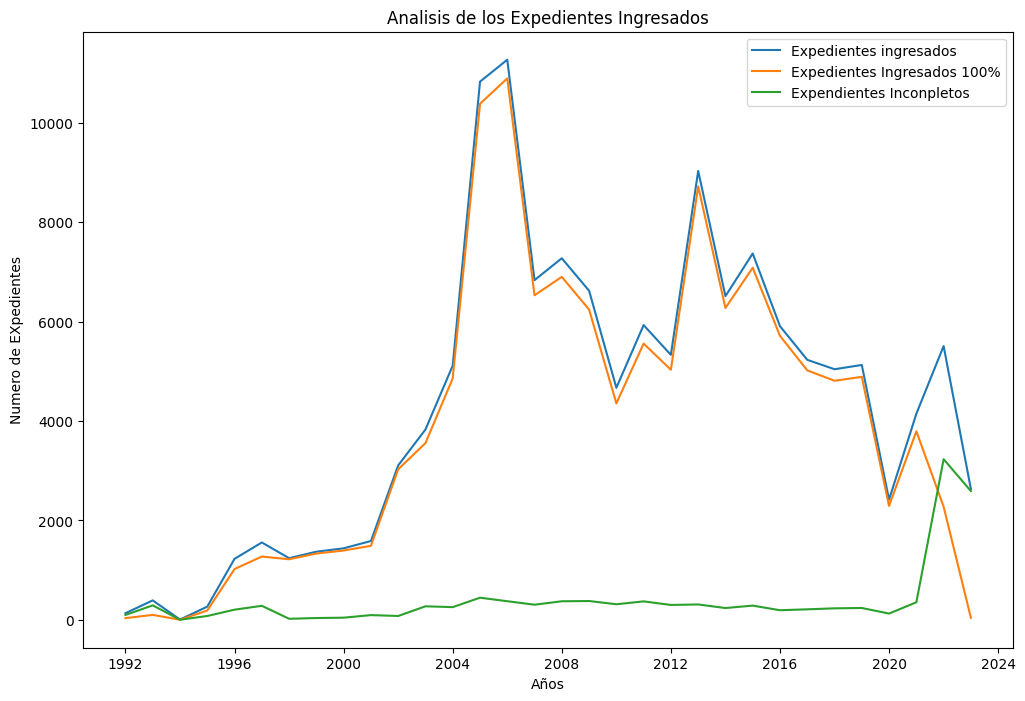

In [348]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_1992_2023,x=data_1992_2023.index,y='Expedientes ingresados',label='Expedientes ingresados')
sns.lineplot(data=data_1992_2023,x=data_1992_2023.index,y='Expedientes Ingresados 100%',label='Expedientes Ingresados 100%')
sns.lineplot(data=data_1992_2023,x=data_1992_2023.index,y='Expendientes Inconpletos',label='Expendientes Inconpletos')
plt.title('Analisis de los Expedientes Ingresados')
plt.ylabel('Numero de EXpedientes')
plt.xlabel('Años')
plt.show()

<Axes: >

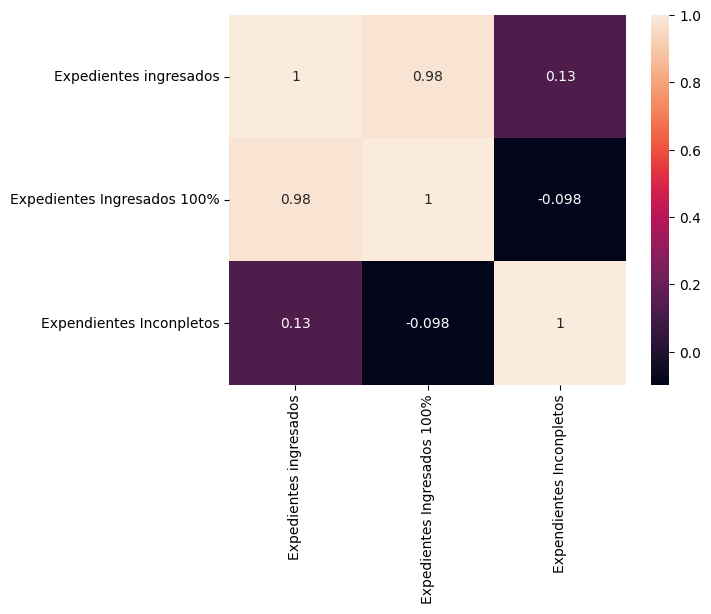

In [349]:
sns.heatmap(data_1992_2023.corr(),annot=True)

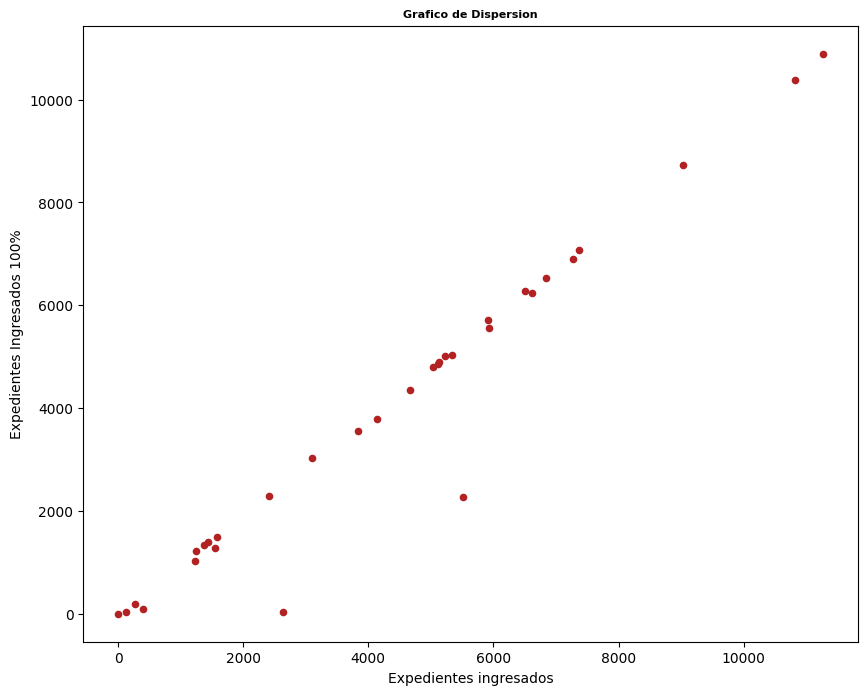

In [350]:
# Grafico 
fig,ax=plt.subplots(figsize=(10,8))
data_1992_2023.plot(x='Expedientes ingresados',
                    y='Expedientes Ingresados 100%',
                    c    = 'firebrick', 
                    kind = "scatter", 
                    ax   = ax)
plt.title('Grafico de Dispersion',fontsize=8,weight='bold')
plt.show()

In [381]:
data_1992_2023

Expedientes ingresados  Expedientes Ingresados 100%  \
Año                                                               
1992-01-01                     134                           35   
1993-01-01                     392                          100   
1994-01-01                       6                            3   
1995-01-01                     266                          188   
1996-01-01                    1227                         1022   
1997-01-01                    1557                         1274   
1998-01-01                    1241                         1219   
1999-01-01                    1371                         1334   
2000-01-01                    1439                         1395   
2001-01-01                    1586                         1490   
2002-01-01                    3107                         3029   
2003-01-01                    3828                         3555   
2004-01-01                    5112                         4856   
2005-01-01                   10825                        10379   
2006-01-01                   11266                        10891   
2007-01-01                    6833                         6528   
2008-01-01                    7273                         6899   
2009-01-01                    6619                         6240   
2010-01-01                    4668                         4354   
2011-01-01                    5929                         5557   
2012-01-01                    5330                         5030   
2013-01-01                    9029                         8719   
2014-01-01                    6511                         6273   
2015-01-01                    7369                         7082   
2016-01-01                    5907                         5713   
2017-01-01                    5230                         5018   
2018-01-01                    5041                         4809   
2019-01-01                    5127                         4888   
2020-01-01                    2418                         2291   
2021-01-01                    4147                         3793   
2022-01-01                    5507                         2275   
2023-01-01                    2633                           42   

            Expendientes Inconpletos  Tasa de Cumplimiento  
Año                                                         
1992-01-01                        99             26.119403  
1993-01-01                       292             25.510204  
1994-01-01                         3             50.000000  
1995-01-01                        78             70.676692  
1996-01-01                       205             83.292584  
1997-01-01                       283             81.824021  
1998-01-01                        22             98.227236  
1999-01-01                        37             97.301240  
2000-01-01                        44             96.942321  
2001-01-01                        96             93.947037  
2002-01-01                        78             97.489540  
2003-01-01                       273             92.868339  
2004-01-01                       256             94.992175  
2005-01-01                       446             95.879908  
2006-01-01                       375             96.671401  
2007-01-01                       305             95.536368  
2008-01-01                       374             94.857693  
2009-01-01                       379             94.274060  
2010-01-01                       314             93.273350  
2011-01-01                       372             93.725755  
2012-01-01                       300             94.371482  
2013-01-01                       310             96.566619  
2014-01-01                       238             96.344648  
2015-01-01                       287             96.105306  
2016-01-01                       194             96.715761  
2017-01-01                       212             95.946463  
2018-01-01               

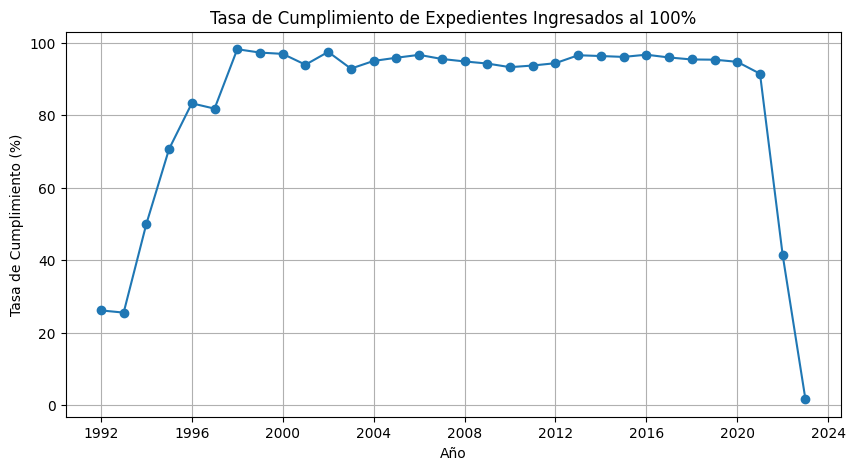

In [379]:
data_1992_2023['Tasa de Cumplimiento']=(data_1992_2023['Expedientes Ingresados 100%'] / data_1992_2023['Expedientes ingresados']) * 100
# Crear una visualización de la tasa de cumplimiento a lo largo de los años
plt.figure(figsize=(10, 5))
plt.plot(data_1992_2023.index, data_1992_2023['Tasa de Cumplimiento'], marker='o', linestyle='-')
plt.title('Tasa de Cumplimiento de Expedientes Ingresados al 100%')
plt.xlabel('Año')
plt.ylabel('Tasa de Cumplimiento (%)')
plt.grid(True)
plt.show()

La tasa de cumplimiento más baja se registró en el año 2022. Es importante destacar que la información con respecto al año 2023 está incompleta, lo que sugiere que su tasa de cumplimiento podría aumentar una vez que se disponga de datos completos.

### **Prediccines con Regression Lineal**

In [351]:
data_1992_2022=data_1992_2023.iloc[:-1]
data_1992_2022

Expedientes ingresados  Expedientes Ingresados 100%  \
Año                                                               
1992-01-01                     134                           35   
1993-01-01                     392                          100   
1994-01-01                       6                            3   
1995-01-01                     266                          188   
1996-01-01                    1227                         1022   
1997-01-01                    1557                         1274   
1998-01-01                    1241                         1219   
1999-01-01                    1371                         1334   
2000-01-01                    1439                         1395   
2001-01-01                    1586                         1490   
2002-01-01                    3107                         3029   
2003-01-01                    3828                         3555   
2004-01-01                    5112                         4856   
2005-01-01                   10825                        10379   
2006-01-01                   11266                        10891   
2007-01-01                    6833                         6528   
2008-01-01                    7273                         6899   
2009-01-01                    6619                         6240   
2010-01-01                    4668                         4354   
2011-01-01                    5929                         5557   
2012-01-01                    5330                         5030   
2013-01-01                    9029                         8719   
2014-01-01                    6511                         6273   
2015-01-01                    7369                         7082   
2016-01-01                    5907                         5713   
2017-01-01                    5230                         5018   
2018-01-01                    5041                         4809   
2019-01-01                    5127                         4888   
2020-01-01                    2418                         2291   
2021-01-01                    4147                         3793   
2022-01-01                    5507                         2275   

            Expendientes Inconpletos  
Año                                   
1992-01-01                        99  
1993-01-01                       292  
1994-01-01                         3  
1995-01-01                        78  
1996-01-01                       205  
1997-01-01                       283  
1998-01-01                        22  
1999-01-01                        37  
2000-01-01                        44  
2001-01-01                        96  
2002-01-01                        78  
2003-01-01                       273  
2004-01-01                       256  
2005-01-01                       446  
2006-01-01                       375  
2007-01-01                       305  
2008-01-01                       374  
2009-01-01                       379  
2010-01-01                       314  
2011-01-01                       372  
2012-01-01                       300  
2013-01-01                       310  
2014-01-01                       238  
2015-01-01                       287  
2016-01-01                       194  
2017-01-01                       212  
2018-01-01                       232  
2019-01-01                       239  
2020-01-01                       127  
2021-01-01                       354  
2022-01-01                      3232

In [352]:
X = data_1992_2022[['Expedientes ingresados']]
y = data_1992_2022['Expedientes Ingresados 100%']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [353]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-186.4947303]
Coeficiente: [('Expedientes ingresados', 0.9638739768652508)]
Coeficiente de determinación R^2: 0.9674287216370641


In [354]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-186.4947303]
Coeficiente: [('Expedientes ingresados', 0.9638739768652508)]
Coeficiente de determinación R^2: 0.9674287216370641


**Statsmodels**

In [355]:
X = data_1992_2022[['Expedientes ingresados']]
y = data_1992_2022['Expedientes Ingresados 100%']

# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-186.4947303]
Coeficiente: [('Expedientes ingresados', 0.9638739768652508)]
Coeficiente de determinación R^2: 0.9674287216370641


In [356]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     487.9
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           1.66e-16
Time:                        17:30:55   Log-Likelihood:                -187.46
No. Observations:                  24   AIC:                             378.9
Df Residuals:                      22   BIC:                             381.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -186.4947    259.463     -0.719      0.4

In [357]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-724.58877881,  351.5993182 ],
       [   0.87337472,    1.05437323]])

**Prediccines**

In [358]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   6916.292605  159.121650    6586.294500    7246.290710   5581.554096   
1  10672.509493  294.468154   10061.819919   11283.199067   9242.275283   
2  10247.441069  277.239758    9672.481002   10822.401137   8832.094038   
3   6089.288733  139.900242    5799.153389    6379.424077   4763.842900   

   obs_ci_upper  
0   8251.031115  
1  12102.743703  
2  11662.788100  
3   7414.734566

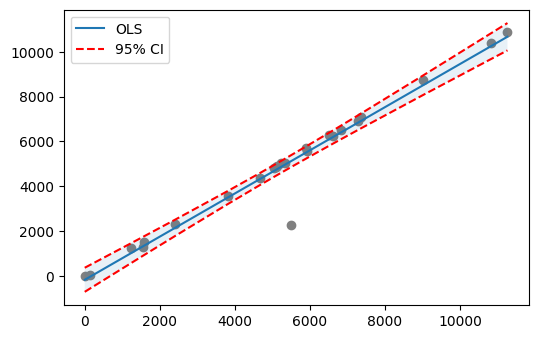

In [359]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend()
plt.show()

**Error de test**

In [360]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 146.10674475596818


### **Predicciones para el año 2023 de expedientes completado al 100%**

In [361]:
nueva_observacion = {
    'const': 1,
    'Expedientes ingresados': 2633
}

# Crear un DataFrame con las características de la nueva observación.
X_nueva = pd.DataFrame(nueva_observacion, index=[0])

# Agregar una constante para el término constante si es necesario.
X_nueva = sm.add_constant(X_nueva, prepend=True)

# Usar el modelo entrenado para hacer la predicción.
prediccion = modelo.predict(X_nueva)

# La variable "prediccion" contendrá el valor predicho para la nueva observación.
print("Predicción:", prediccion[0])

Predicción: 2351.3854507826018


In [368]:
data_1992_2023.tail()

Expedientes ingresados  Expedientes Ingresados 100%  \
Año                                                               
2019-01-01                    5127                         4888   
2020-01-01                    2418                         2291   
2021-01-01                    4147                         3793   
2022-01-01                    5507                         2275   
2023-01-01                    2633                           42   

            Expendientes Inconpletos  
Año                                   
2019-01-01                       239  
2020-01-01                       127  
2021-01-01                       354  
2022-01-01                      3232  
2023-01-01                      2591

In [370]:
# Seleccionar la columna "Expedientes ingresados" para el año 2023.
expedientes_2023 = data_1992_2023.loc['2023-01-01', 'Expedientes ingresados']

# Imprimir el valor correspondiente al año 2023.
print("Expedientes ingresados en 2023:", expedientes_2023)
print("Predicción 	Expedientes Ingresados 100%:", prediccion[0].round(0))
print("Expendientes Inconpletos :", expedientes_2023 - prediccion[0].round(0) )

Expedientes ingresados en 2023: 2633
Predicción 	Expedientes Ingresados 100% 2023: 2351.0
Expendientes Inconpletos : 282.0


In [374]:
# Crear un diccionario con los datos
datos = {
    'Expedientes ingresados': [2633],
    'Predicción Expedientes Ingresados 100%': [prediccion[0].round(0)],
    'Expedientes Incompletos': [expedientes_2023 - prediccion[0].round(0)]
}

# Crear un DataFrame con los datos y establecer el índice en el año 2023
df_2023 = pd.DataFrame(datos, index=['2023-01-01'])

# Imprimir el DataFrame
df_2023.head()


Expedientes ingresados  Predicción Expedientes Ingresados 100%  \
2023-01-01                    2633                                  2351.0   

            Expedientes Incompletos  
2023-01-01                    282.0

In [383]:
df_2023['Tasa de Cumplimiento']=(df_2023['Predicción Expedientes Ingresados 100%'] / df_2023['Expedientes ingresados']) * 100
df_2023

Expedientes ingresados  Predicción Expedientes Ingresados 100%  \
2023-01-01                    2633                                  2351.0   

            Expedientes Incompletos  Tasa de Cumplimiento  
2023-01-01                    282.0             89.289784

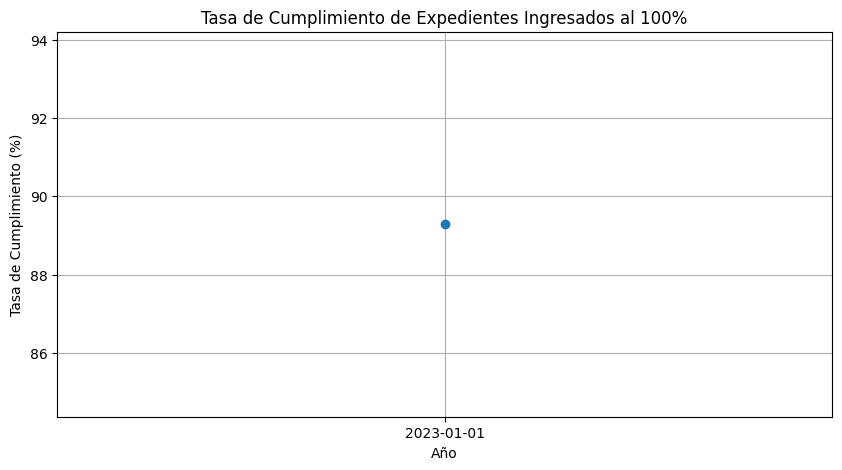

In [384]:
plt.figure(figsize=(10, 5))
plt.plot(df_2023.index, df_2023['Tasa de Cumplimiento'], marker='o', linestyle='-')
plt.title('Tasa de Cumplimiento de Expedientes Ingresados al 100%')
plt.xlabel('Año')
plt.ylabel('Tasa de Cumplimiento (%)')
plt.grid(True)
plt.show()

# **Conclusiones**

Los resultados derivados del análisis de datos en este conjunto de datos, en particular la tasa de cumplimiento que evalúa el período desde la fecha de ingreso del expediente al Tribunal Constitucional hasta la fecha en que el expediente se devuelve al Poder Judicial, revisten una relevancia significativa. Esta métrica es fundamental para cuantificar cuántos expedientes se encuentran completamente completos al 100%, lo que, a su vez, nos brinda información valiosa sobre la eficiencia y capacidad de procesamiento de expedientes a lo largo de los años.

En esencia, esta tasa de cumplimiento nos permite comprender en qué medida se logra procesar un expediente de manera integral y dentro de los plazos establecidos. Al examinar esta métrica a lo largo de diferentes años, podemos identificar tendencias y patrones en la gestión de expedientes, lo que facilita la evaluación del rendimiento del sistema en el tiempo.

En última instancia, estos resultados no solo son esenciales para la toma de decisiones en la administración de expedientes legales, sino que también pueden ofrecer información valiosa sobre la carga de trabajo del Tribunal Constitucional y su capacidad para gestionar los expedientes de manera eficiente. La comprensión de esta tasa de cumplimiento puede ser fundamental para mejorar los procesos y garantizar un flujo más eficaz de expedientes a través del sistema judicial.

Utilizando este conjunto de datos, se realizó una predicción para el año 2023, estimando que de los 2633 expedientes ingresados, 2351 cumplirían al 100%, lo que equivale a una tasa de cumplimiento del 89.28%. Si los lectores desean obtener detalles específicos sobre el proceso y el código utilizado, pueden referirse al título "Predicciones para el año 2023 de expedientes completado al 100%" en el notebook. Esto ayudará a contextualizar mejor tus hallazgos y conclusiones.

**Motivacion**

La elección de este conjunto de datos se basó en la firme convicción de que comprender el tiempo que transcurre desde que un expediente ingresa al Tribunal Constitucional hasta el momento en que se devuelve al Poder Judicial es esencial para impulsar mejoras significativas en el sistema legal. Esta motivación surge de un profundo interés en optimizar los procesos judiciales, garantizar la eficiencia en la gestión de expedientes y, en última instancia, fortalecer el acceso a la justicia.

En un contexto donde la celeridad y la transparencia en los procedimientos legales son aspectos cruciales para garantizar los derechos de los ciudadanos, el análisis de esta variable se convierte en un instrumento valioso. Esta motivación radica en el deseo de identificar posibles cuellos de botella, áreas de mejora y tendencias a lo largo del tiempo que puedan conducir a una administración más eficaz de los expedientes judiciales.

Además, esta exploración de datos persigue la meta de contribuir al diseño de políticas públicas y estrategias que impulsen la justicia pronta y expedita. En última instancia, la motivación detrás de este análisis se basa en el compromiso de hacer que el sistema legal sea más accesible, equitativo y eficiente para todos los ciudadanos.